<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/Ensemble_Boosting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble   Boosting

**Agenda:**

- Use Case
  - Problem Statement
  - Dataset Description
- Model Preparation
- Introduction to Ensemble Boosting
  - Sequential Process of Boosting
  - Combining Models in Boosting
  - Weightage Assignment
  - Challenges and Importance
  - Adaptive Boosting (AdaBoost)
  - Gradient Boosting
  - Xgboost
- Bagging v/s Boosting

## Use Case

### Problem Statement

The primary objective is to build a multi-class classification model that can classify body actions into predefined categories. These categories include both aggressive and normal actions, such as elbowing, clapping, kicking, hugging, etc.

### Dataset Description

[Download Dataset From Here](https://drive.google.com/drive/folders/1kz1RET8fVQcDbiCGXNubIhGiwehB3Q4L?usp=drive_link)

The dataset comprises sensor data collected from individuals performing different body actions. The sensor data captures electrical signals from various body movements, which are then processed and categorized into specific actions.

1. Sensor Data Collection:

- The sensor data is collected using specialized devices or sensors capable of capturing various physiological signals and movements.
- These sensors may include accelerometers, gyroscopes, or other motion-sensing technologies, strategically placed on the human body to capture movement patterns accurately.

2.Categorization of Body Actions:

- The collected sensor data is annotated and categorized based on the type of body action being performed.
- Body actions are broadly classified into two categories:
  - Aggressive Actions: Actions involving forceful or intense movements, such as elbowing, kicking, hammering, etc.
  - Normal Actions: Actions characterized by typical, non-aggressive movements, such as bowing, clapping, handshaking, etc.
- Each recorded instance of sensor data is associated with a specific body action category, allowing for supervised learning tasks.



In [ ]:
# Import necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
from matplotlib import pyplot as plt  # Matplotlib for data visualization
import io  # io for handling file I/O
import random  # Random for generating random numbers

In [ ]:
# Import necessary libraries
import warnings  # Import the warnings module

# Filter out specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Ignore UserWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Ignore RuntimeWarnings

In [ ]:
# Importing the necessary function from the google.colab library
from google.colab import drive

# Mounting Google Drive to the Colab environment
drive.mount('/content/drive')

# - This code imports the `drive` function from the google.colab library.
# - The `drive.mount()` function is then called with the argument '/content/drive', which mounts the Google Drive to the Colab environment.
# - This allows access to files stored in Google Drive within the Colab notebook environment.

Mounted at /content/drive


In [ ]:
import os  # Importing the OS module to interact with the operating system
import pandas as pd  # Importing pandas library for data manipulation and analysis

# Initialize an empty dictionary to store actions and their corresponding indices
actions = {}

# List of directories containing data files
data_dirs = [
    "/content/drive/MyDrive/EMG Physical Action Data Set/sub1/Aggressive/txt",
    "/content/drive/MyDrive/EMG Physical Action Data Set/sub1/Normal/txt"
]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Initialize an index variable
ind = 0

# Iterate over each directory in the data_dirs list
for dirs in data_dirs:
    # Iterate over each file in the current directory
    for files in os.listdir(dirs):
        # Open each file for reading
        with open(os.path.join(dirs, files), "r") as f:
            # Read the contents of the file into a DataFrame using pandas read_csv function
            # Specify separator as '\t' (tab-separated)
            # Specify no header and name columns as ch1, ch2, ..., ch8
            temp = pd.read_csv(f,
                               sep="\t",
                               header=None,
                               names=["ch" + str(i) for i in range(1, 9)]
                               )

            # Initialize an empty DataFrame to store chunked data
            temp_chunked = pd.DataFrame()

            # Chunk the data into groups of 10 rows, taking maximum values in each group
            for i in range(0, len(temp), 10):
                temp_chunked = pd.concat([temp_chunked, temp.iloc[i:i+10].max().to_frame().T], ignore_index=True)

            # Create a list of labels (file names without extension) for each chunked data
            labels = [files[:-4] for i in range(len(temp_chunked))]

            # Store the action labels with their corresponding index
            actions[files[:-4]] = ind

            # Add a column 'Actions' to the chunked data containing the corresponding labels
            temp_chunked["Action"] = labels

            # Concatenate the chunked data to the main data DataFrame
            data = pd.concat([data, temp_chunked])

            # Increment the index
            ind += 1

# Print the actions dictionary
print(actions)

# Display the first few rows of the data DataFrame
data.head()

{'Slapping': 0, 'Sidekicking': 1, 'Pushing': 2, 'Punching': 3, 'Pulling': 4, 'Kneeing': 5, 'Headering': 6, 'Hamering': 7, 'Frontkicking': 8, 'Elbowing': 9, 'Waving': 10, 'Walking': 11, 'Running': 12, 'Standing': 13, 'Jumping': 14, 'Hugging': 15, 'Handshaking': 16, 'Seating': 17, 'Bowing': 18, 'Clapping': 19}


,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Action
0,2,113,129,95,-1042,845,-94,-407,Slapping
1,4000,250,-54,142,-2550,303,-1458,1765,Slapping
2,2410,1516,803,8,3284,309,-1877,1199,Slapping
3,-1556,876,710,85,4000,213,-1517,646,Slapping
4,4000,275,304,137,4000,180,238,251,Slapping


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19711 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ch1     19711 non-null  int64 
 1   ch2     19711 non-null  int64 
 2   ch3     19711 non-null  int64 
 3   ch4     19711 non-null  int64 
 4   ch5     19711 non-null  int64 
 5   ch6     19711 non-null  int64 
 6   ch7     19711 non-null  int64 
 7   ch8     19711 non-null  int64 
 8   Action  19711 non-null  object
dtypes: int64(8), object(1)
memory usage: 1.5+ MB


**Dataset Size:**

- The dataset contains a substantial amount of data with 19,711 observations.
- It comprises eight variables, making it a moderately large dataset suitable for robust analysis.

In [ ]:
Y= data["Action"]
X = data.drop(columns = ['Action'])

#### Multiclass Problem

In [ ]:
print(Y.unique())

['Slapping' 'Sidekicking' 'Pushing' 'Punching' 'Pulling' 'Kneeing'
 'Headering' 'Hamering' 'Frontkicking' 'Elbowing' 'Waving' 'Walking'
 'Running' 'Standing' 'Jumping' 'Hugging' 'Handshaking' 'Seating' 'Bowing'
 'Clapping']


- The task at hand is classified as a multi-class classification problem.
- The dataset includes nearly ten categories each for both normal and aggressive actions, totaling around 20 unique categories.

In [ ]:
Y = Y.map(actions)
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Action, dtype: int64

#### Check Balancing of Data

- Balancing the dataset is crucial, even in the context of multi-class classification problems.
- An imbalanced dataset can lead to biased model performance.

In [ ]:
print(Y.value_counts())

10    1000
6     1000
17    1000
14    1000
11    1000
7     1000
19    1000
5     1000
12     997
1      983
18     983
8      982
0      979
9      978
15     976
13     973
2      968
4      966
3      964
16     962
Name: Action, dtype: int64


- The analysis indicates that the dataset is well-balanced, with no significant class imbalance observed.
- The maximum count for a category is approximately 1,000, while the minimum count is around 962, demonstrating good balance across categories.

#### Handling Negative Values

- Negative values are observed in the dataset, likely representing directional information.
- Since the sign is not crucial for the analysis, the decision is made to consider only the absolute values.
- All negative values in both input variables (X) and target variable (y) are transformed to their absolute equivalents.

#### Reducing Noise From Data

**EWM (Exponential Weighted Moving Average)** is a technique commonly used in machine learning for smoothing data and reducing noise. It assigns exponentially decreasing weights to older observations, with more recent observations receiving higher weights.

In [ ]:
X = X.ewm(10).mean()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19711 entries, 0 to 999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ch1     19711 non-null  float64
 1   ch2     19711 non-null  float64
 2   ch3     19711 non-null  float64
 3   ch4     19711 non-null  float64
 4   ch5     19711 non-null  float64
 5   ch6     19711 non-null  float64
 6   ch7     19711 non-null  float64
 7   ch8     19711 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


Without using EWM mean score will be low but when we will use it we will get high mean score.

## Model Preparation

### Data Splitting

- The dataset is divided into training and testing sets using the train-test split method.
- The split ratio chosen is 80:20, with 80% of the data allocated to the training set and 20% to the testing set.
- The shuffle parameter is set to true to ensure random shuffling of the data before splitting.


In [ ]:
from sklearn.model_selection import train_test_split  # Importing the train_test_split function from scikit-learn

# Convert X and Y to numpy arrays if they are not already in that format
X = np.array(X.values.tolist())
Y = np.array(Y.values.tolist())

# Split the data into training and testing sets using train_test_split
# test_size=0.2 indicates that 20% of the data will be used for testing, while 80% will be used for training
# shuffle=True ensures that the data is randomly shuffled before splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Print the sizes of the sets created
print(f"Sizes of the sets created are:\nTraining set: {X_train.shape[0]}\nTest set: {X_test.shape[0]}")

Sizes of the sets created are:
Training set: 15768
Test set: 3943


### Initial Model: Single Decision Tree

- To begin, a simple decision tree model is built.
- The decision tree classifier from the scikit-learn library is utilized.
- Due to uncertainty about the ideal hyperparameters such as maximum depth and maximum leaf nodes for the dataset, a grid search approach is adopted.
- Grid search involves exploring different combinations of hyperparameters to identify the combination that yields the best performance.
- The decision tree model is trained on various combinations of hyperparameters using grid search, and the mean accuracy scores are evaluated.

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC  # Importing the DecisionTreeClassifier class
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning

# Defining a dictionary of hyperparameters to tune
params = {
    "max_depth": [3, 5, 7],          # Maximum depth of the decision tree
    "max_leaf_nodes": [15, 20, 25]   # Maximum number of leaf nodes in the decision tree
}

# Creating an instance of the DecisionTreeClassifier
model1 = DTC()

# Creating a GridSearchCV object
# The estimator is the model (DecisionTreeClassifier) we want to use
# params contains the hyperparameters to tune
# scoring='accuracy' specifies that we want to optimize for classification accuracy
# cv=5 specifies 5-fold cross-validation
clf = GridSearchCV(model1, params, scoring='accuracy', cv=5)

# Fitting the GridSearchCV object to the training data
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [15, 20, 25]},
             scoring='accuracy')

In [ ]:
res = clf.cv_results_  # Extracting the cross-validation results from the GridSearchCV object

# Iterating over each set of parameters in the results
for i in range(len(res['params'])):
    # Printing the parameters, mean test score, and rank of the current set of parameters
    print(f"Parameters: {res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters: {'max_depth': 3, 'max_leaf_nodes': 15} Mean_score: 0.3852738612318974 Rank: 7
Parameters: {'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.3852738612318974 Rank: 7
Parameters: {'max_depth': 3, 'max_leaf_nodes': 25} Mean_score: 0.3852738612318974 Rank: 7
Parameters: {'max_depth': 5, 'max_leaf_nodes': 15} Mean_score: 0.48465197361130635 Rank: 6
Parameters: {'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.48795009775191706 Rank: 5
Parameters: {'max_depth': 5, 'max_leaf_nodes': 25} Mean_score: 0.48902825483917745 Rank: 4
Parameters: {'max_depth': 7, 'max_leaf_nodes': 15} Mean_score: 0.6118719356367832 Rank: 3
Parameters: {'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.6199259052334332 Rank: 2
Parameters: {'max_depth': 7, 'max_leaf_nodes': 25} Mean_score: 0.6235409060750992 Rank: 1


In this case, the best performing decision tree model is identified with a maximum depth of 7 and maximum leaf nodes of 25, achieving a mean accuracy score of 0.6290592184954953.

## Introduction to Ensemble Boosting

- Boosting is introduced as a fundamental and widely employed technique within the realm of machine learning.
- Its significance is underscored by its pervasive use in various applications, making it a crucial skill for data scientists and machine learning practitioners.
- The technique of boosting is acclaimed for its ability to significantly enhance model performance by iteratively improving upon the predictive accuracy of weak learners.
- Unlike some other machine learning methods that rely on single, standalone models, boosting operates through the **sequential construction** of a series of models, often referred to as "**weak learners**" or "**base learners**."
- These base models are typically simple, such as decision trees with limited depth or linear models, and may individually exhibit only modest predictive capability.
- However, through the process of boosting, these weak learners are sequentially trained, with each subsequent model aiming to correct the errors made by its predecessors.
- By focusing on the instances where previous models struggled the most, subsequent models can learn to better capture the underlying patterns in the data.
-  This iterative learning process gradually leads to the creation of a strong ensemble model that combines the predictive power of multiple weak learners, resulting in a final model with superior performance.
- The iterative nature of boosting allows it to incrementally refine the model's predictions, effectively adapting to the intricacies of the dataset and capturing complex relationships that may elude simpler modeling approaches.
- As a result, boosting has become a cornerstone technique in machine learning, widely employed across various domains, including classification, regression, and ranking tasks.

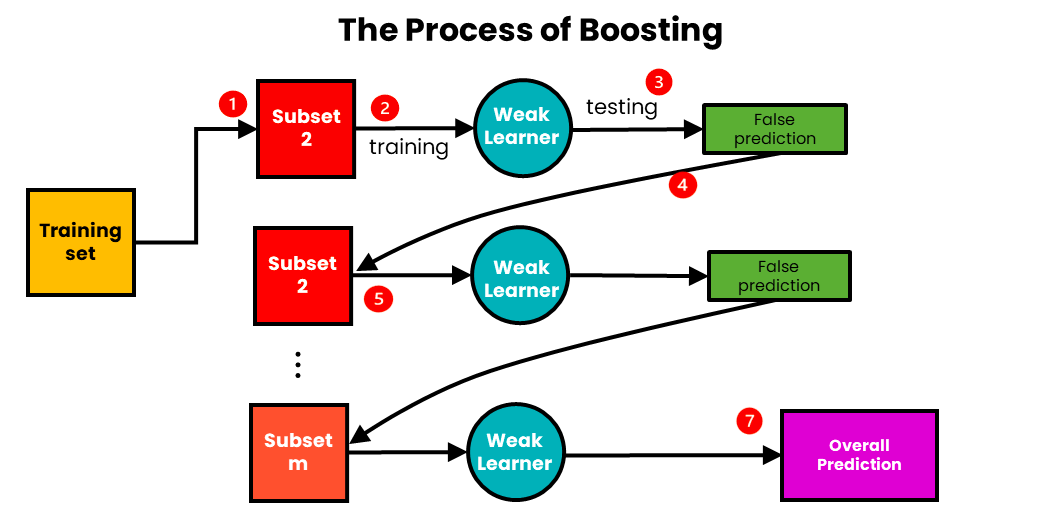

### Sequential Process of Boosting

- Boosting is likened to a relay marathon where each participant runs a segment before passing the baton to the next runner.
- Similarly, in boosting, multiple models (trees) are trained sequentially, with each subsequent model learning from the errors of the previous ones.
- The errors from one model influence the training of the next model, leading to a sequential learning process.

### Combining Models in Boosting

- Once multiple models are trained sequentially, they are combined to make predictions.
- Each model is assigned a weight, and the predictions from all models are aggregated based on these weights.
- The final prediction is computed as the weighted sum of predictions from individual models.

### Weightage Assignment

- Assigning weights to individual models requires computing the optimal weightage for each model.
- The process involves determining the contribution of each model to the final prediction based on its performance and error.
- Optimal weightage ensures that models with higher performance contribute more to the final prediction.

### Challenges and Importance:



- Boosting poses computational challenges due to its sequential nature, making it computationally heavier than bagging.
- Despite challenges, boosting remains a critical technique in machine learning for its ability to enhance model performance significantly.
- Understanding boosting is considered essential for data scientists and machine learning practitioners due to its widespread use and effectiveness.

### Adaptive Boosting (AdaBoost)

**What is AdaBoost?**

AdaBoost algorithm, short for **Adaptive Boosting**, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances. By sequentially training weak learners on these weighted data points, AdaBoost constructs a strong ensemble model capable of making accurate predictions.

#### How does AdaBoost work?

It works by combining multiple weak classifiers, often referred to as "stumps," to create a strong classifier. The key idea behind AdaBoost is to focus on the instances that are hard to classify and give them more weight, allowing subsequent weak classifiers to focus more on those difficult instances.

* **Initialization**: Each instance in the training dataset is given an equal weight initially.
* **Iterative Training**: AdaBoost iteratively trains a sequence of weak classifiers. In each iteration:
  * A weak classifier, typically a decision stump, is trained on the weighted training data.
  * The weak classifier's error rate on the training data is calculated.
  * The importance of the weak classifier is determined based on its error rate, with lower error rates resulting in higher importance.
  * The weights of the training instances are updated. Instances misclassified by the current weak classifier are given higher weights, making them more influential in the next iteration.
* **Combination**: Once all weak classifiers are trained, AdaBoost combines them into a single strong classifier. The combination is typically done by weighted majority voting, where the weight of each weak classifier's decision is proportional to its importance.
* **Final Model**: The combined strong classifier, which is a weighted sum of weak classifiers, is used to make predictions on new data.

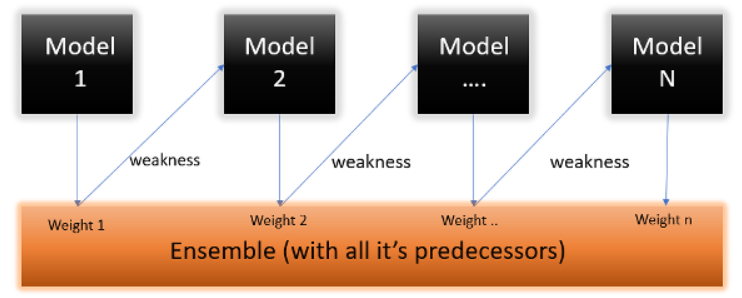

Let’s take an example to understand this, suppose you built a decision tree algorithm on a dataset, and from there, you get an accuracy of 80%. After this, you apply a different algorithm and check the accuracy, and it comes out to be 75% for KNN and 70% for Linear Regression.

When building different models on the same dataset, we observe variations in accuracy. However, leveraging the power of AdaBoost, we can combine these algorithms to enhance the final predictions. By averaging the results from diverse models, Adaboost allows us to achieve higher accuracy and bolster predictive capabilities effectively.

A **Stump** refers to a simple decision tree model consisting of only one decision node and two leaf nodes. In other words, it's a decision tree with a single decision split. Stumps are commonly used as weak classifiers in AdaBoost due to their simplicity and efficiency. Despite their simplicity, when combined appropriately within the AdaBoost framework, stumps can contribute to the creation of a powerful ensemble classifier.

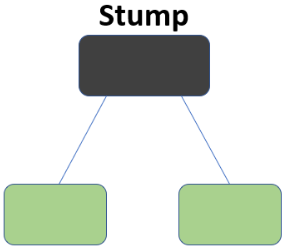

**First, let's understand the working of AdaBoost visually through an example.** Later we'll deep dive into the mathematical implementation.

Let's say we have this data -

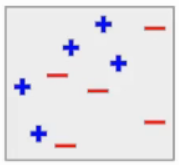

Here, we have the blue positives and the red negatives. Now the first step is to build a model to classify this data.

**Model 1**

Suppose the first model gives the following result, where it is able to classify two blue points on the left side and all red points correctly. But the model also miss-classify the three blue points here.

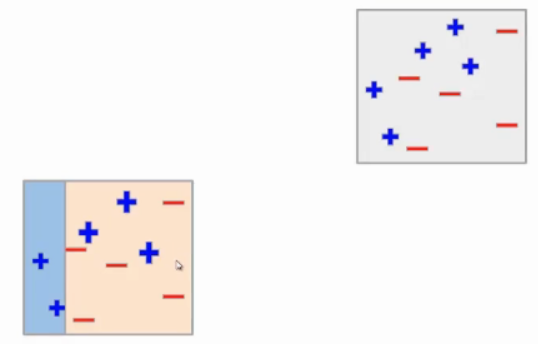

**Model 2**

Now, these miss-classified data points will be given higher weight. So these three blue positive points will be given higher weights in the next iteration. For representation, the points with higher weight are bigger than the others in the image. Giving higher weights to these points means our model is going to focus more on these values. Now we will build a new model.

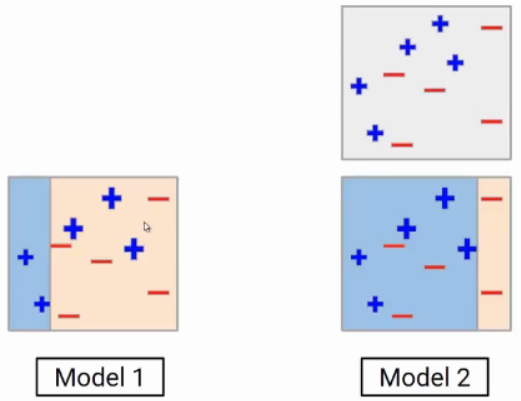

In the second model we see that the model boundary has been shifted to the right side in order to correctly classify the higher weighted points. Still, it’s not a perfect model. Also there are three red negatives which are miss-classified by Model 2.

**Model 3**

Now, these miss-classified red points will get a higher weight. Again we will build another model and do the predictions. The task of the third model is to focus on these three red negative points. So the decision boundary will be something as shown here.

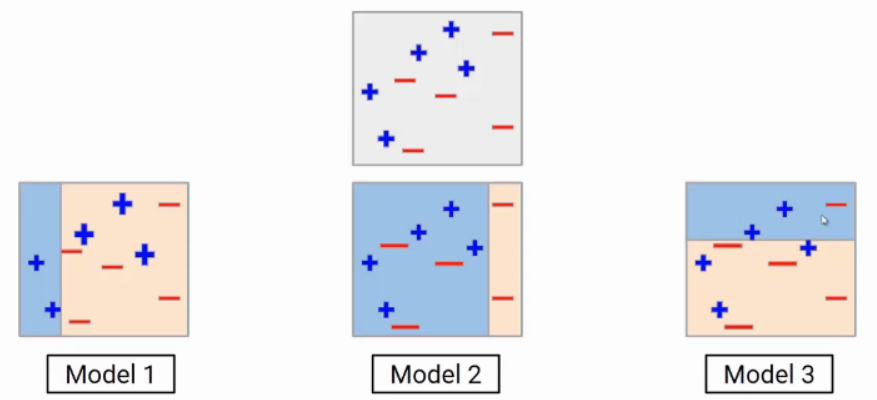

This new model again incorrectly predicted some data points. At this point, we can say all these individual models are not strong enough to classify the points correctly and are often called weak learners.

**Ensembling the weak learners**

Now, we have to aggregate these models. One of the ways could be taking the weighted average of the individual weak learners. So our final model will be the weighted mean of individual models.

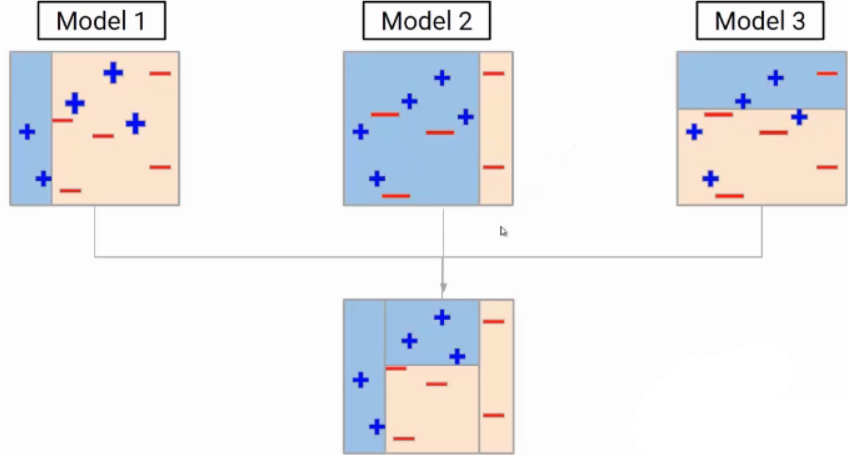

After multiple iterations, we will be able to create the right decision boundary with the help of all the previous weak learners. As you can see the final model is able to classify all the points correctly. This final model is known as a strong learner.

**Now, let's look at how AdaBoost works mathematically.**

**Step 1: Assigning Weights**

The Image shown below is the actual representation of a sample dataset. Since the target column is binary, it is a classification problem. First of all, these data points will be assigned some weights. Initially, all the weights will be equal.

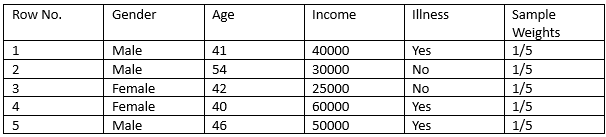

The formula to calculate the sample weights is:

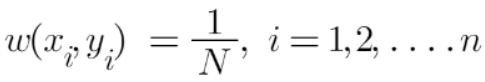

Where N is the total number of data points

Here since we have 5 data points, the sample weights assigned will be 1/5.

**Step 2: Classify the Samples**

We start by seeing how well “Gender” classifies the samples and will see how the variables (Age, Income) classify the samples.

We’ll create a decision stump for each of the features and then calculate the Gini Index of each tree. The tree with the lowest Gini Index will be our first stump.

Here in our dataset, let’s say Gender has the lowest gini index, so it will be our first stump.

**Step 3: Calculate the Influence**

We’ll now calculate the “Amount of Say” or “Importance” or “Influence” for this classifier in classifying the data points using this formula:

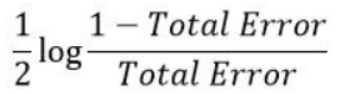

The total error is nothing but the summation of all the sample weights of misclassified data points.

Here in our dataset, let’s assume there is 1 wrong output, so our total error will be 1/5, and the alpha (performance of the stump) will be:

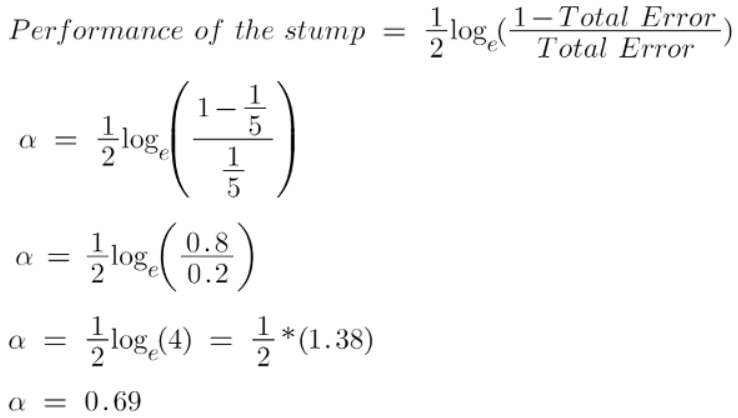

Note: Total error will always be between 0 and 1.

0 Indicates perfect stump, and 1 indicates horrible stump.

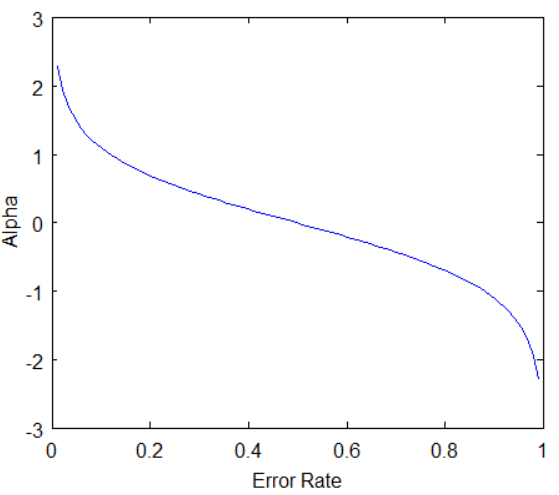

From the graph above, we can see that when there is no misclassification, then we have no error (Total Error = 0), so the “amount of say (alpha)” will be a large number.

When the classifier predicts half right and half wrong, then the Total Error = 0.5, and the importance (amount of say) of the classifier will be 0.

If all the samples have been incorrectly classified, then the error will be very high (approx. to 1), and hence our alpha value will be a negative integer.

**Step 4: Calculate TE and Performance**

* You might be wondering about the significance of calculating the Total Error (TE) and performance of an Adaboost stump. The reason is straightforward – updating the weights is crucial. If identical weights are maintained for the subsequent model, the output will mirror what was obtained in the initial model.

* The wrong predictions will be given more weight, whereas the correct predictions weights will be decreased. Now when we build our next model after updating the weights, more preference will be given to the points with higher weights.

* After finding the importance of the classifier and total error, we need to finally update the weights, and for this, we use the following formula:

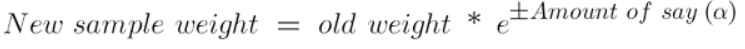

The amount of, say (alpha) will be **negative** when the sample is **correctly classified**.

The amount of, say (alpha) will be **positive** when the sample is **miss-classified**.

There are four correctly classified samples and 1 wrong. Here, the sample weight of that datapoint is 1/5, and the amount of say/performance of the stump of Gender is 0.69.

New weights for correctly classified samples are:

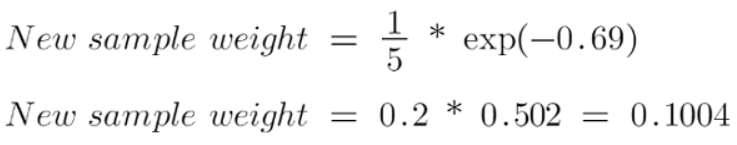

For wrongly classified samples, the updated weights will be:

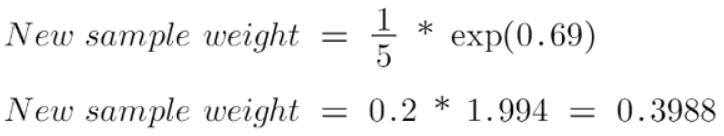

**Note**

See the sign of alpha when I am putting the values, the **alpha is negative** when the data point is correctly classified, and this decreases the sample weight from 0.2 to 0.1004. It is **positive** when there is **misclassification**, and this will increase the sample weight from 0.2 to 0.3988

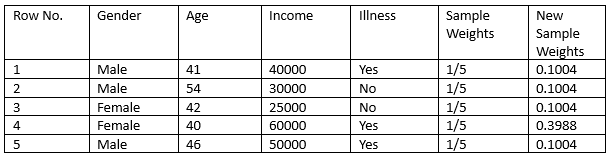

We know that the total sum of the sample weights must be equal to 1, but here if we sum up all the new sample weights, we will get 0.8004. To bring this sum equal to 1, we will normalize these weights by dividing all the weights by the total sum of updated weights, which is 0.8004. So, after normalizing the sample weights, we get this dataset, and now the sum is equal to 1.

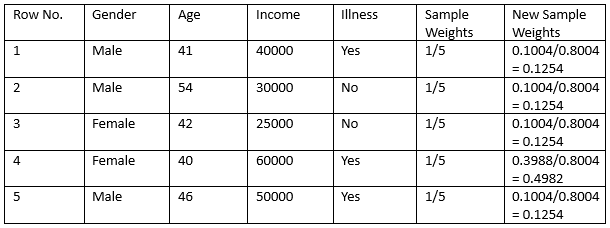

**Step 5: Decrease Errors**

Now, we need to make a new dataset to see if the errors decreased or not. For this, we will remove the “sample weights” and “new sample weights” columns and then, based on the “new sample weights,” divide our data points into buckets.

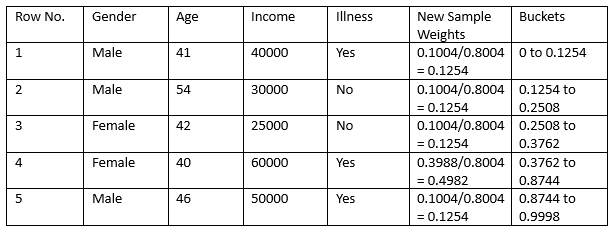

**Step 6: New Dataset**

We are almost done. Now, what the algorithm does is selects random numbers from 0-1. Since incorrectly classified records have higher sample weights, the probability of selecting those records is very high.

Suppose the 5 random numbers our algorithm take is 0.38,0.26,0.98,0.40,0.55.

Now we will see where these random numbers fall in the bucket, and according to it, we’ll make our new dataset shown below.

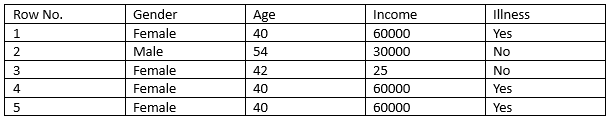

This comes out to be our new dataset, and we see the data point, which was wrongly classified, has been selected 3 times because it has a higher weight.

**Step 7: Repeat Previous Steps**

Now this act as our new dataset, and we need to repeat all the above steps i.e. -

* Assign equal weights to all the data points.
* Find the stump that does the best job classifying the new collection of samples by finding their Gini Index and selecting the one with the lowest Gini index.
* Calculate the “Amount of Say” and “Total error” to update the previous sample weights.
* Normalize the new sample weights.

Iterate through these steps until and unless a low training error is achieved.

Suppose, with respect to our dataset, we have constructed 3 decision trees (DT1, DT2, DT3) in a sequential manner. If we send our test data now, it will pass through all the decision trees, and finally, we will see which class has the majority, and based on that, we will do predictions
for our test dataset.

#### Key Features

- **Error Calculation:** At each iteration, AdaBoost calculates the error by summing the weights of the misclassified instances.
- **Model Weighting (Alpha):** AdaBoost assigns a weight (alpha) to each weak learner based on its performance. Alpha reflects the importance of the model in the final ensemble.
- **Updating Sample Weights:** AdaBoost adjusts the weights of training instances, increasing the weights of misclassified instances to ensure the subsequent models focus on them.

**Stopping Criteria:**

- AdaBoost continues to add weak learners until a stopping criterion is met. Common criteria include reaching a maximum number of iterations or observing no further improvement in performance on a validation set.

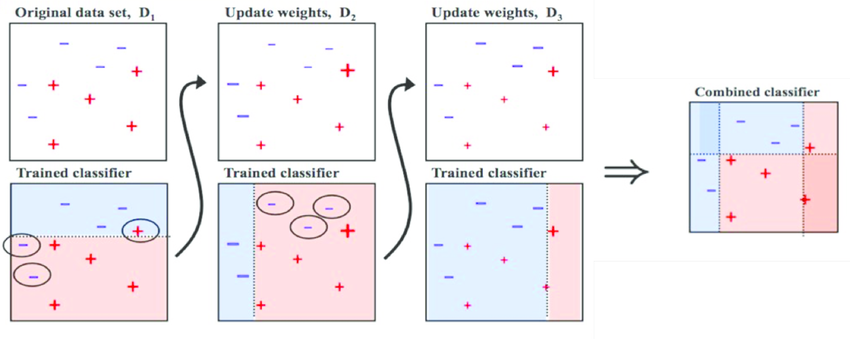

In above image Adaboost is use in this way:
- Initially, a decision stump is trained on the dataset, leading to misclassifications.
- Misclassified instances are assigned higher weights, influencing the subsequent model iterations.
- Each new weak learner focuses on correcting the misclassifications from the previous iteration.
- By combining decision stumps with adjusted weights, AdaBoost iteratively improves the model's predictive performance.

**Overfitting:**

- AdaBoost is susceptible to overfitting, especially if the number of iterations is too high.
- Monitoring the training and validation errors can help identify the point where further iterations lead to overfitting.

**Hyperparameter Tuning:**

- Key hyperparameters in AdaBoost include the number of iterations and the choice of weak learner (e.g., decision stumps).
- Tuning these hyperparameters is crucial to achieving the right balance between bias and variance.

#### Implementation of Adaboost

In [ ]:
import datetime as dt  # Importing the datetime module
from sklearn.ensemble import AdaBoostClassifier  # Importing the AdaBoostClassifier class

# Creating an instance of AdaBoostClassifier with a decision tree base estimator
# max_depth=5 sets the maximum depth of the decision tree base estimator
model2 = AdaBoostClassifier(DTC(max_depth=5))

# Defining a dictionary of hyperparameters to tune
params = {
    "n_estimators": [50, 100, 150],   # Number of estimators (weak learners or base classifiers)
    "learning_rate": [0.1, 0.2, 0.3]  # Learning rate, which shrinks the contribution of each classifier
}

# Creating a GridSearchCV object
# The estimator is the model (AdaBoostClassifier) we want to use
# params contains the hyperparameters to tune
# cv=5 specifies 5-fold cross-validation
# scoring='accuracy' specifies that we want to optimize for classification accuracy
clf = GridSearchCV(model2, params, cv=5, scoring='accuracy')

# Fitting the GridSearchCV object to the training data
clf.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5)),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

The above code will take around 5 to 10 minutes to run.

**Hyperparameters:**

- **Base Estimator:** A decision tree is used as the base estimator, but with a shallow depth (not a decision stump).
- **Number of Estimators:** The number of estimators is tested with values of 50, 100, and 150. The best performance is observed with 150 estimators.
- **Learning Rate:** The default learning rate is 1, but smaller rates (0.1, 0.2, 0.3) are explored. A learning rate of 0.3 provides better results.

In [ ]:
res = clf.cv_results_  # Extracting the cross-validation results from the GridSearchCV object

# Iterating over each set of parameters in the results
for i in range(len(res['params'])):
    # Printing the parameters, mean test score, and rank of the current set of parameters
    print(f"Parameters: {res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters: {'learning_rate': 0.1, 'n_estimators': 50} Mean_score: 0.8001644516872638 Rank: 7
Parameters: {'learning_rate': 0.1, 'n_estimators': 100} Mean_score: 0.8102481336030687 Rank: 4
Parameters: {'learning_rate': 0.1, 'n_estimators': 150} Mean_score: 0.8070140042366875 Rank: 6
Parameters: {'learning_rate': 0.2, 'n_estimators': 50} Mean_score: 0.7933157840435807 Rank: 9
Parameters: {'learning_rate': 0.2, 'n_estimators': 100} Mean_score: 0.8121502384921527 Rank: 3
Parameters: {'learning_rate': 0.2, 'n_estimators': 150} Mean_score: 0.8195072241492385 Rank: 2
Parameters: {'learning_rate': 0.3, 'n_estimators': 50} Mean_score: 0.7949631969713697 Rank: 8
Parameters: {'learning_rate': 0.3, 'n_estimators': 100} Mean_score: 0.8075844466553681 Rank: 5
Parameters: {'learning_rate': 0.3, 'n_estimators': 150} Mean_score: 0.819570856916574 Rank: 1


**Optimal Parameters:**

The optimal parameters identified are:
- Base Estimator: Decision Tree (Shallow)
- Number of Estimators: 150
- Learning Rate: 0.3

**Performance Evaluation:**

- The performance is evaluated based on test scores.
- AdaBoost with the identified parameters achieves a significantly higher accuracy (0.891) compared to a single decision tree (0.62).

**Conclusion:**
- The results indicate that the AdaBoost classifier with the specified parameters outperforms a single decision tree, demonstrating the effectiveness of ensemble methods.
- Further optimization and experimentation with hyperparameters could potentially lead to even better results.

### Gradient Boosting  (GB)

* Gradient boosting is a machine learning ensemble technique that combines the predictions of multiple weak learners, typically decision trees, sequentially. It aims to improve overall predictive performance by optimizing the model’s weights based on the errors of previous iterations, gradually reducing prediction errors and enhancing the model’s accuracy.
* Gradient boosting is a method standing out for its prediction speed and accuracy, particularly with large and complex datasets.
* There are mainly two types of error, bias error and variance error. Gradient boost algorithm helps us minimize bias error of the model.
* This algorithm starts by building a decision stump and then assigning equal weights to all the data points. Then it increases the weights for all the points which are misclassified and lowers the weight for those that are easy to classify or are correctly classified. A new decision stump is made for these weighted data points.
* The main difference between AdaBoost and Gradient Boosting is that Gradient boosting has a fixed base estimator i.e., Decision Trees whereas in AdaBoost we can change the base estimator according to our needs.

When the target column is continuous, we use **Gradient Boosting Regressor** whereas when it is a classification problem, we use **Gradient Boosting Classifier**.

The only difference between the two is the **Loss function**. The objective here is to minimize this loss function by adding weak learners using gradient descent. Since it is based on loss function hence for regression problems, we’ll have different loss functions like **Mean squared error (MSE)** and for classification, we will have different for e.g **log-likelihood**.

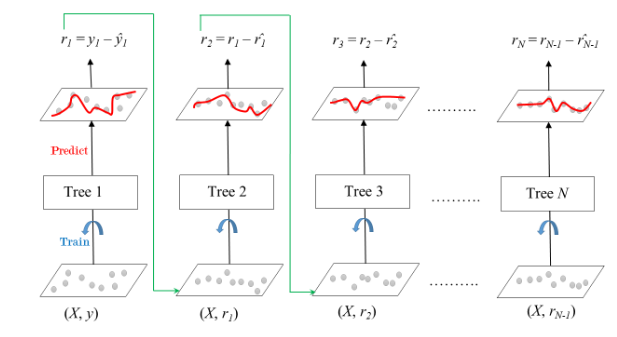

Here's a more detailed explanation of Gradient Boosting:

1. **Sequential Model Building:** Gradient Boosting builds a sequence of models, each aimed at reducing the errors of the previous models. The process starts with a simple initial model, often a shallow decision tree.

2. **Error Calculation:** After the initial model, the errors (residuals) between the actual target values and the predictions are calculated. These errors represent the difference between the observed outcomes and the model's predictions.

3. **Building Subsequent Models:** The next model in the sequence is then trained to predict the residuals produced by the previous model. In essence, it focuses on capturing the patterns or relationships missed by the earlier models.

4. **Combining Models:** Each new model is added to the ensemble, and their predictions are combined. The combined predictions gradually improve as each subsequent model corrects the errors of the previous ones.

5. **Gradient Descent:** The term "gradient" in Gradient Boosting refers to the use of gradient descent optimization to minimize the loss function. In each iteration, the model updates its predictions by moving in the direction that minimizes the loss function, effectively reducing the errors.

6. **Learning Rate:** Gradient Boosting introduces a hyperparameter called the learning rate, which controls the contribution of each model to the final ensemble. A lower learning rate makes the algorithm more robust by preventing overfitting but requires more iterations to converge.

7. **Feature Importance:** Gradient Boosting can also provide insights into feature importance, indicating which features have the most significant impact on the predictions.

8. **Regularization:** Gradient Boosting can incorporate regularization techniques to prevent overfitting, such as limiting the depth of the trees or adding penalties to the loss function.

9. **Scalability:** Gradient Boosting can be computationally intensive and may require careful tuning of hyperparameters. However, advancements in algorithms and hardware have made it more scalable for large datasets.

#### How does Gradient Boosting works?

Gradient Boosting consist of 3 elements as follows:

* Loss function
* Weak learners
* Additive model

Let's understand these three elements in detail.

* **Loss function**:
Although, there is a big family of Loss functions in machine learning that can be used depending on the type of tasks being solved. The use of the loss function is estimated by the demand of specific characteristics of the conditional distribution such as robustness. While using a loss function in our task, we must specify the loss function and the function to calculate the corresponding negative gradient. Once, we get these two functions, they can be implemented into gradient boosting machines easily. However, there are several loss functions have been already proposed for GBM algorithms.

* **Weak Learner**:
Weak learners are the base learner models that learn from past errors and help in building a strong predictive model design for boosting algorithms in machine learning. Generally, decision trees work as a weak learners in boosting algorithms. Boosting is defined as the framework that continuously works to improve the output from base models. Many gradient boosting applications allow you to "plugin" various classes of weak learners at your disposal. Hence, decision trees are most often used for weak (base) learners.
  * **How to train weak learners**: Machine learning uses training datasets to train base learners and based on the prediction from the previous learner, it improves the performance by focusing on the rows of the training data where the previous tree had the largest errors or residuals. E.g. shallow trees are considered weak learner to decision trees as it contains a few splits. Generally, in boosting algorithms, trees having up to 6 splits are most common. Below is a sequence of training the weak learner to improve their performance where each tree is in the sequence with the previous tree's residuals. Further, we are introducing each new tree so that it can learn from the previous tree's errors. These are as follows:
    * Consider a data set and fit a decision tree into it. **F1(x)=y**
    * Fit the next decision tree with the largest errors of the previous tree. **h1(x)=y?F1(x)**
    * Add this new tree to the algorithm by adding both in steps 1 and 2. **F2(x)=F1(x)+h1(x)**
    * Again fit the next decision tree with the residuals of the previous tree. **h2(x)=y?F2(x)**
    * Repeat the same which we have done in step 3. **F3(x)=F2(x)+h2(x)**
    
    Continue this process until some mechanism (i.e. cross-validation) tells us to stop. The final model here is a stagewise additive model of b individual trees:
    **f(x)=B∑b=1fb(x)**
    Hence, trees are constructed greedily, choosing the best split points based on purity scores like Gini or minimizing the loss.

* **Additive Model**:
The additive model is defined as adding trees to the model. Although we should not add multiple trees at a time, only a single tree must be added so that existing trees in the model are not changed. Further, we can also prefer the gradient descent method by adding trees to reduce the loss.
  
  In the past few years, the gradient descent method was used to minimize the set of parameters such as the coefficient of the regression equation and weight in a neural network. After calculating error or loss, the weight parameter is used to minimize the error. But recently, most ML experts prefer weak learner sub-models or decision trees as a substitute for these parameters. In which, we have to add a tree in the model to reduce the error and improve the performance of that model. In this way, the prediction from the newly added tree is combined with the prediction from the existing series of trees to get a final prediction. This process continues until the loss reaches an acceptable level or is no longer improvement required.


**Step 1:**

Let’s assume X, and Y are the input and target having N samples. Our goal is to learn the function f(x) that maps the input features X to the target variables y. It is boosted trees i.e the sum of trees.

The loss function is the difference between the actual and the predicted variables.

$L(f)= \sum ^{N}_{i=1}L(y_i,f(x_i))$

**Step 2:**

**We want to minimize the loss function L(f) with respect to f**.
$\hat f_0 (x) = arg\underset{f}{min} \;L(f) = arg\underset{f}{min} \sum ^{N}_{i=1}L(y_i,f(x_i))$

If our gradient boosting algorithm is in M stages then To improve the $f_m$   the algorithm can add some new estimator as $h_m$    having $1\le m \le M$   

 $\hat y_i = F_{m+1}(x_i) = F_m(x_i) + h_m(x_i)$

**Step 3: Steepest Descent**

For M stage gradient boosting, The steepest Descent finds $h_m = -\rho_m g_m$  where  $\rho _m$  is constant and known as step length and $g_m$  is the gradient of loss function L(f)

$g_{im} =-\left[\frac{\partial L(y_i,f(x_i))}{\partial f(x_i)} \right]_{f(x_i)=f_{m-1}(x_i)}$

**Step 4: Solution**

The gradient Similarly for M trees:

$f_m (x) = f_{m-1} (x) + \left(\underset{h_{m}\epsilon H}{argmin} \left[ \sum ^{N}_{i=1}L(y_i,f_{m-1}(x_i)+h_m(x_i)) \right]\right)(x)$

The current solution will be

$f_m = f_{m-1}-\rho_m g_m$

 - Gradient Boosting is a powerful and versatile machine learning technique that often achieves state-of-the-art performance in various predictive modeling tasks.
 - Its ability to sequentially improve predictions by learning from previous mistakes makes it a popular choice in both academic research and practical applications.

#### Implementation of Gradient Boosting

In [ ]:
x = np.arange(0, 50)
y = pd.DataFrame({'x':x})

In [ ]:
y1 = np.random.uniform(10, 15, 10)
y2 = np.random.uniform(20, 25, 10)
y3 = np.random.uniform(0, 5, 10)
y4 = np.random.uniform(30, 32, 10)
y5 = np.random.uniform(13, 17, 10)

y = np.concatenate((y1, y2, y3, y4, y5))
y = y[:, None]

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics

In [ ]:
from sklearn.tree import DecisionTreeRegressor

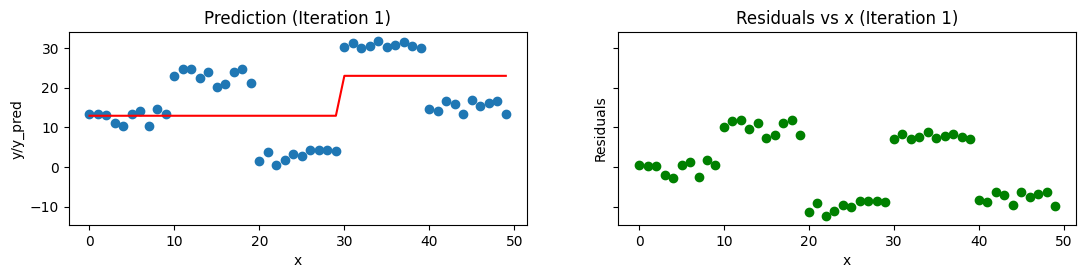

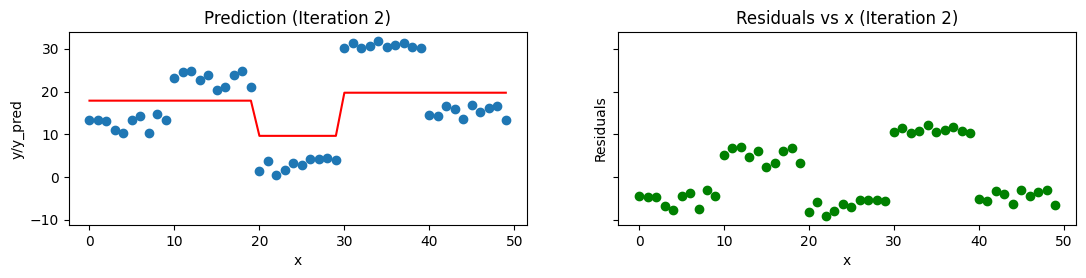

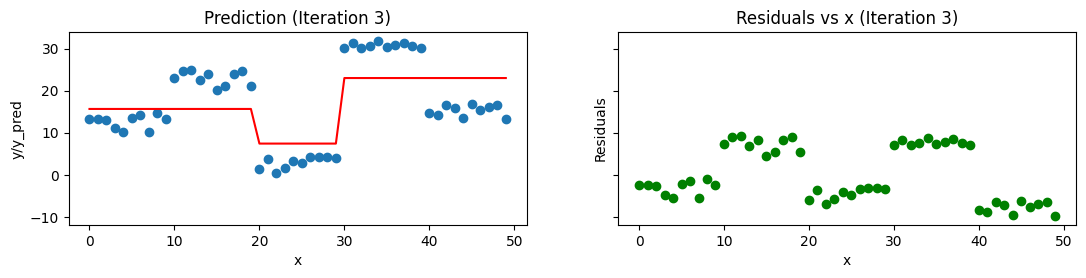

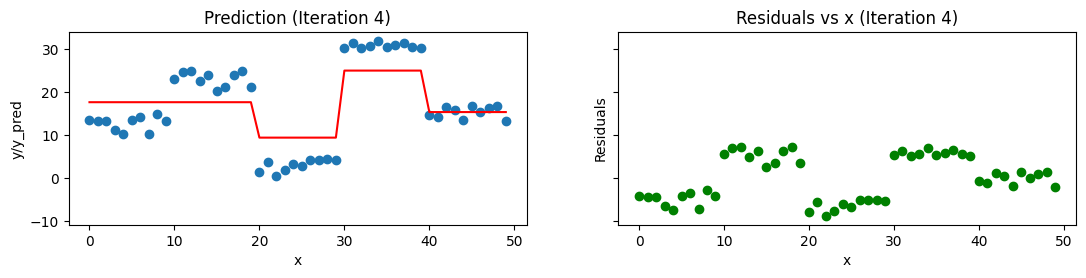

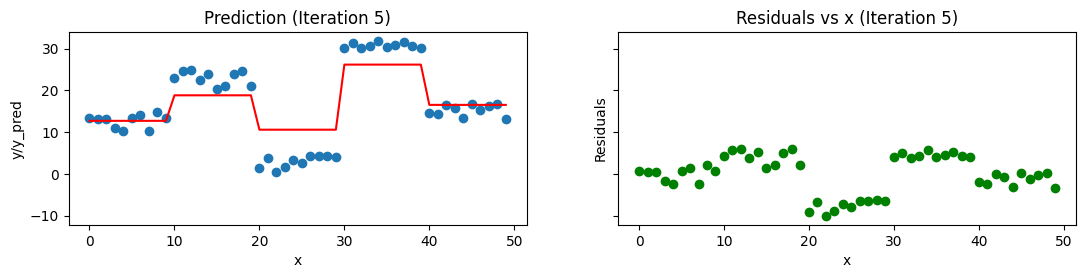

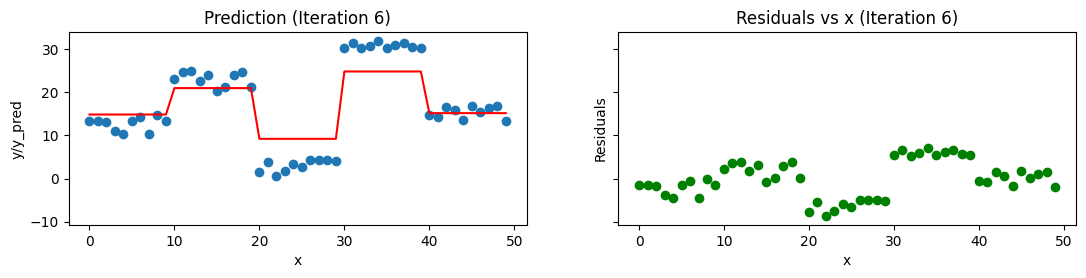

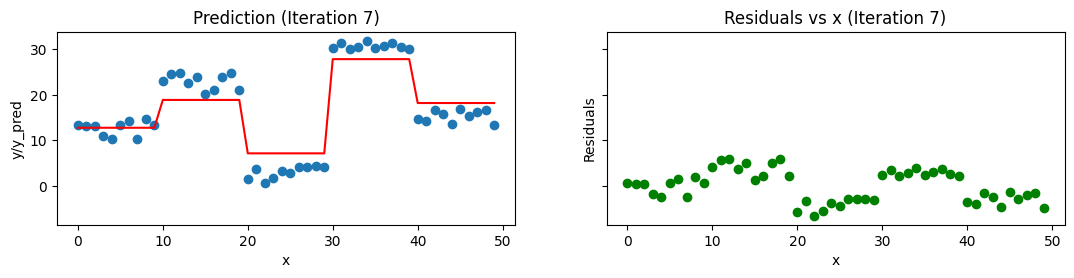

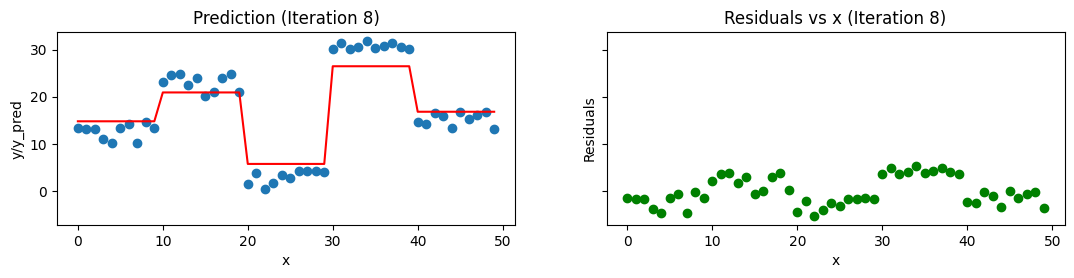

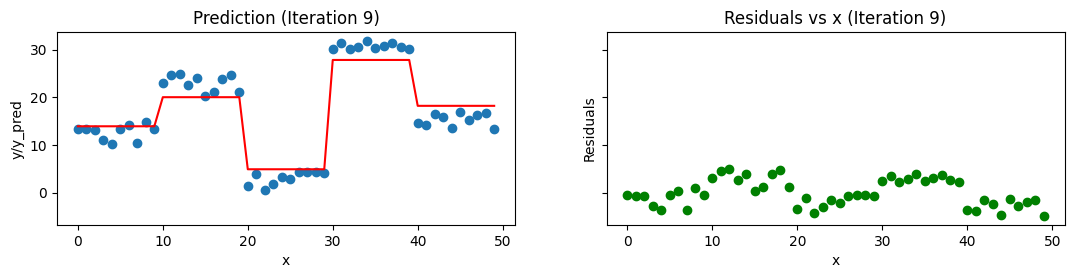

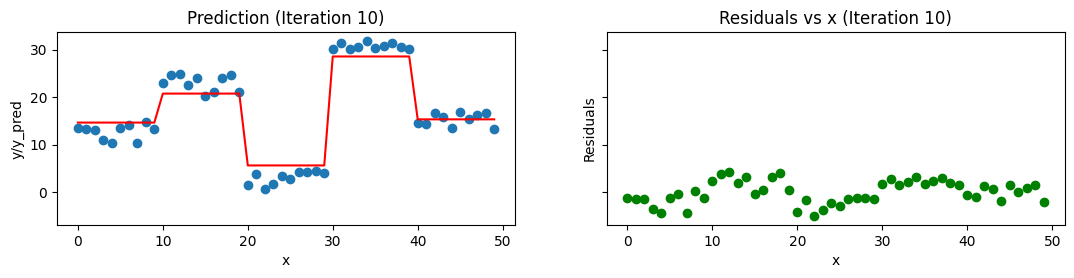

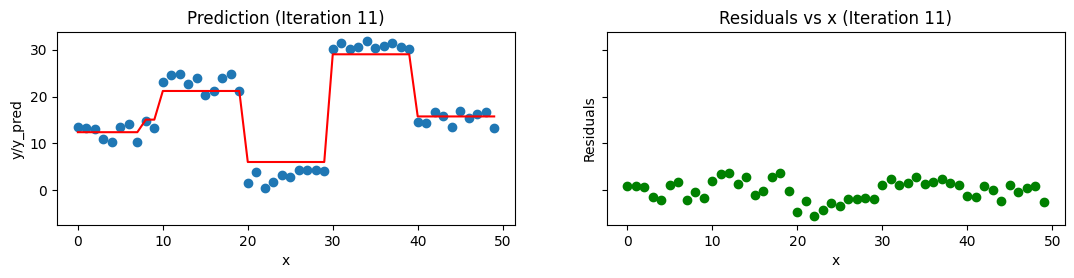

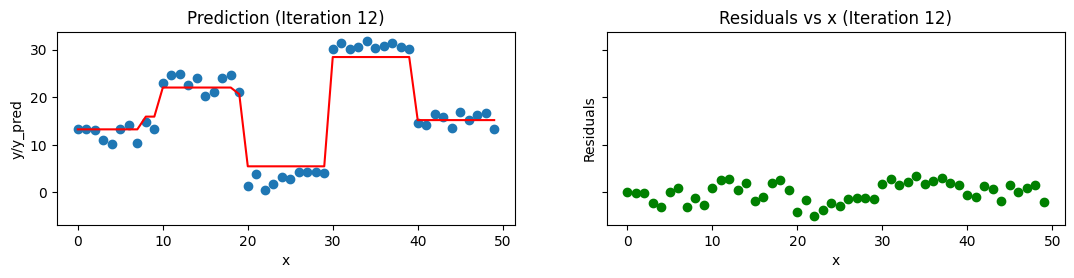

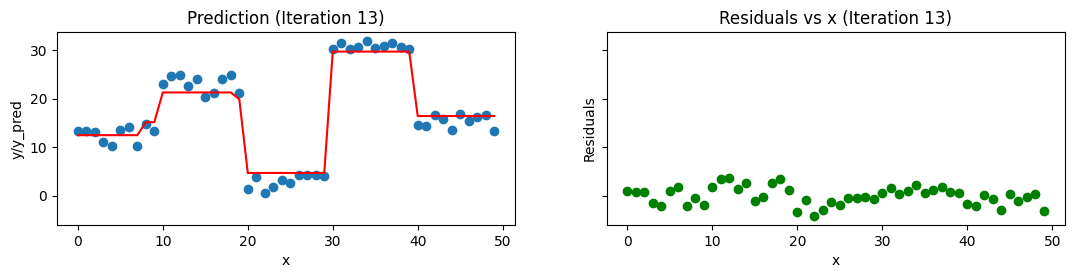

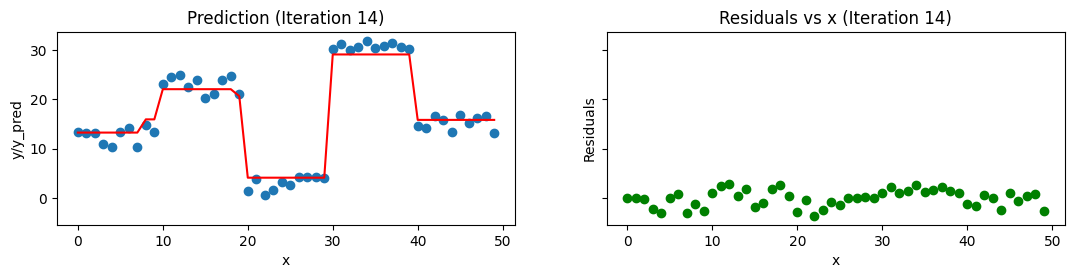

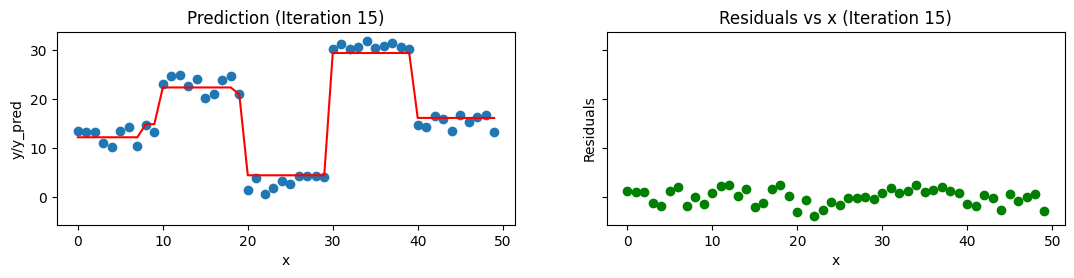

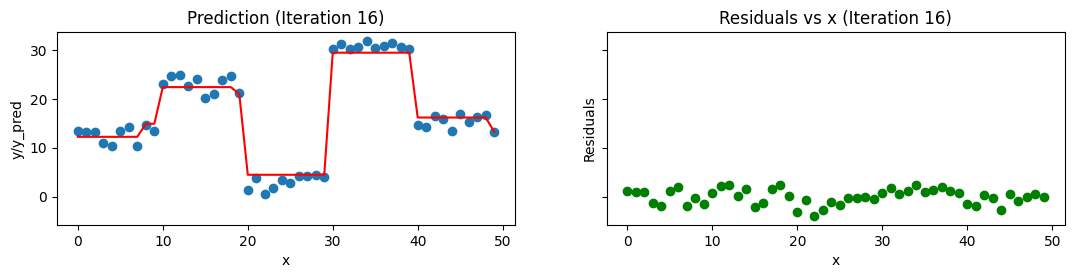

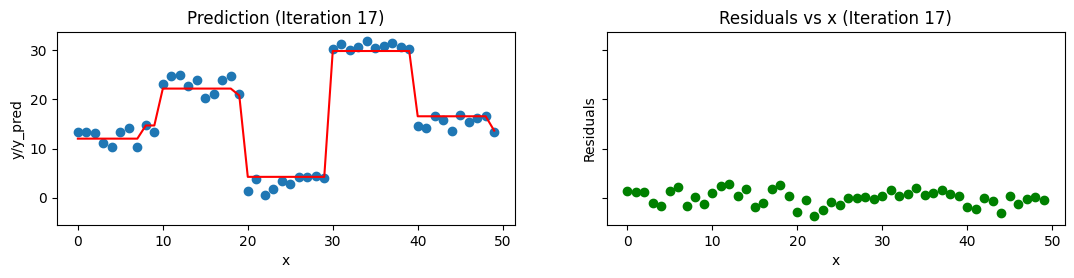

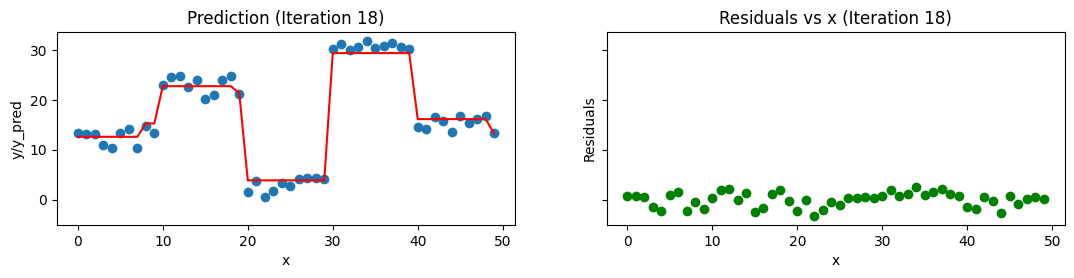

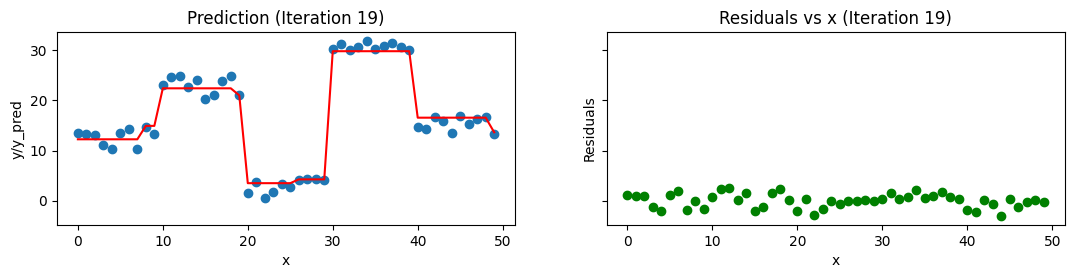

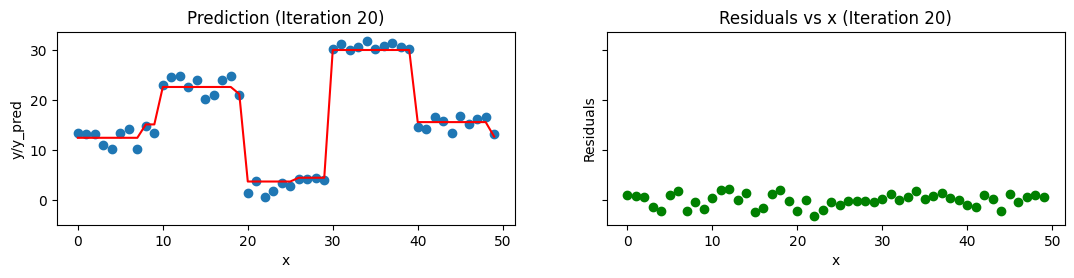

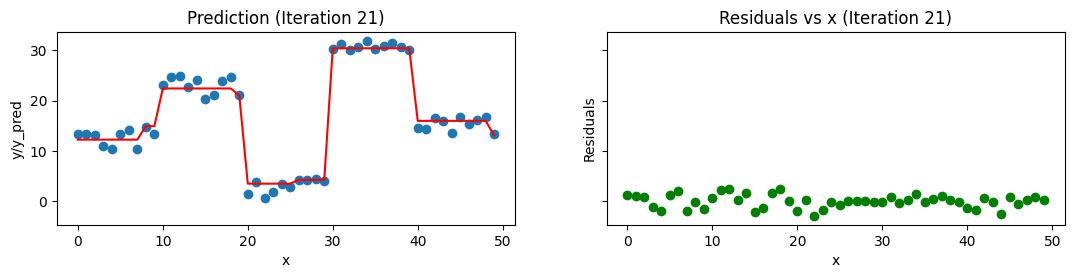

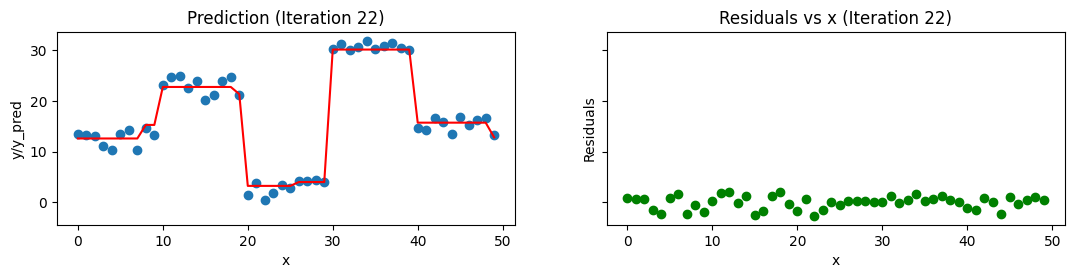

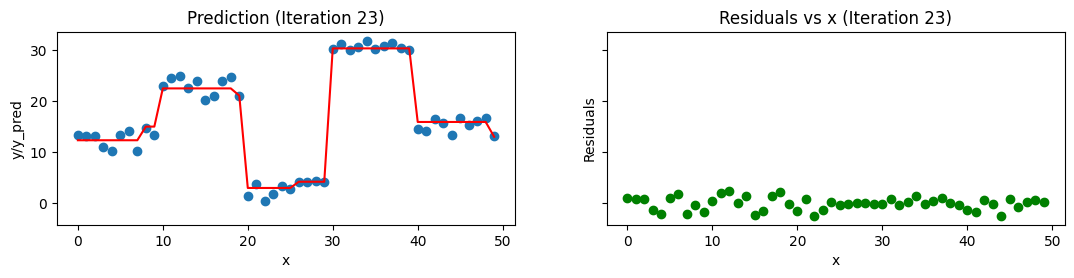

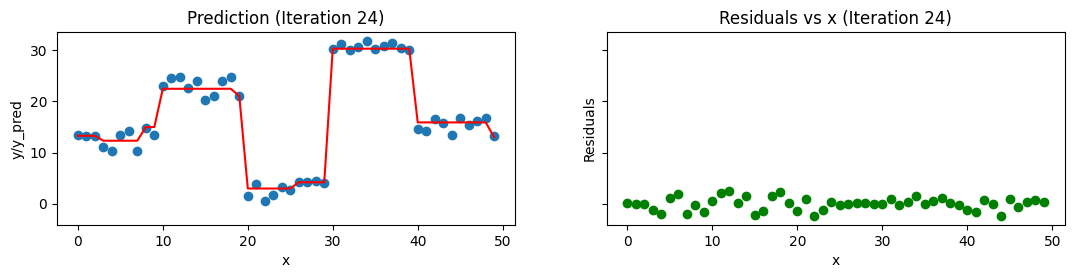

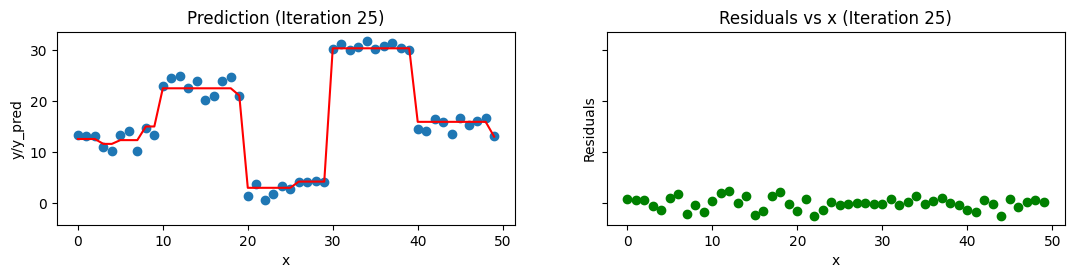

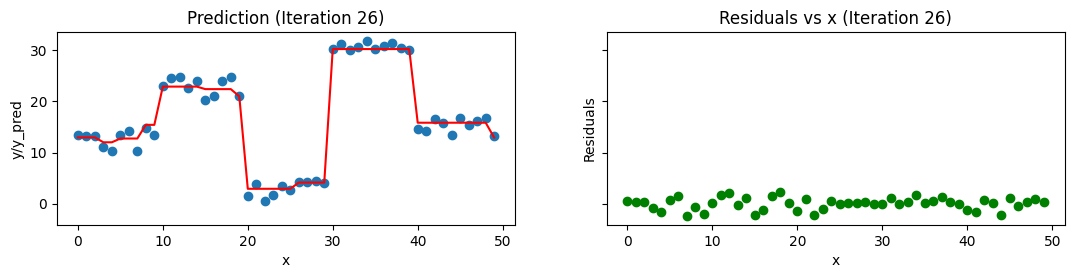

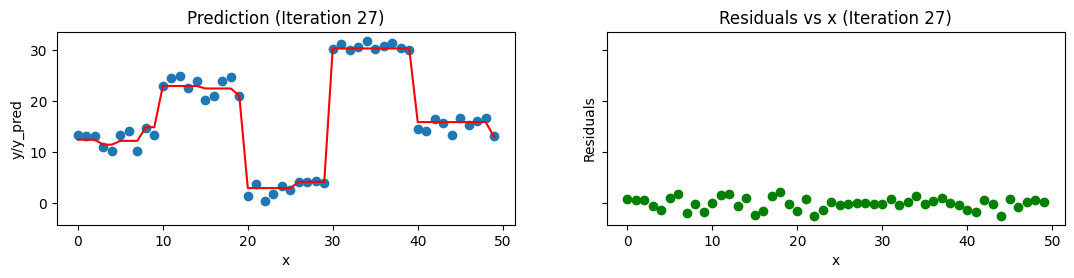

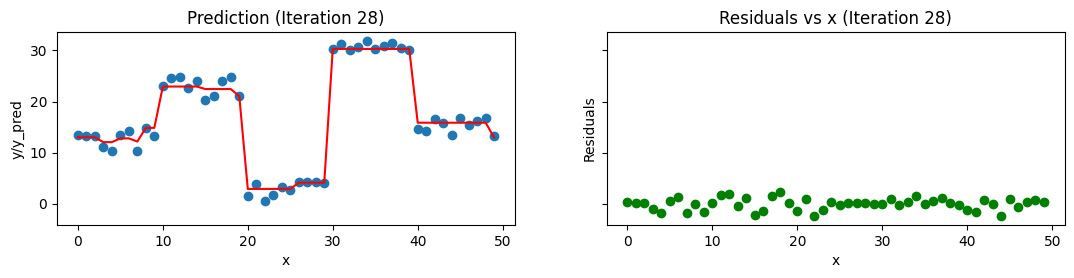

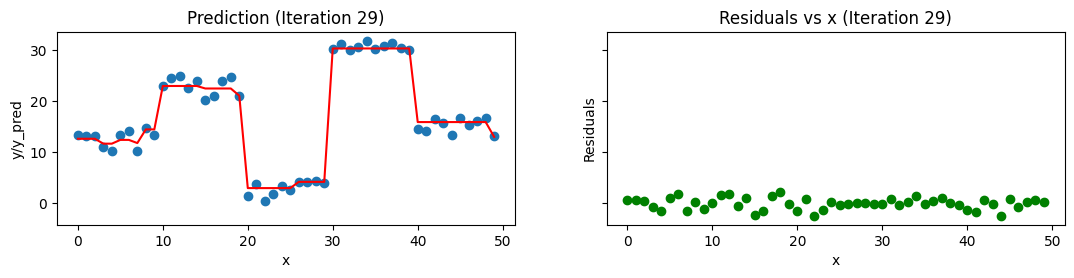

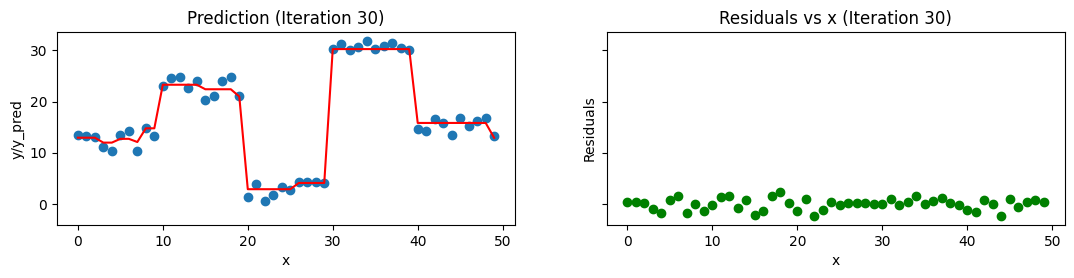

In [ ]:
xi = x  # initialization of input
yi = y  # initialization of target

# Assuming xi and yi are 1D arrays
xi = xi.reshape(-1, 1)  # Reshape xi to a 2D array with a single feature
yi = yi  # No need to reshape yi

ei = 0  # initialization of error
n = len(yi)  # number of rows
predf = 0  # initialization of prediction 0

for i in range(30):  # like n_estimators
    tree = DecisionTreeRegressor()
    tree.fit(xi, yi)

    tree_split = tree.tree_.threshold[0]

    left_idx = np.where(xi <= tree_split)[0]
    right_idx = np.where(xi > tree_split)[0]

    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), len(left_idx)))  # replace left side mean y
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), len(right_idx)))  # right side mean y

    predi = predi[:, None]  # make long vector (nx1) in compatible with
    predf = predf + predi  # final prediction will be previous value + new prediction of residual

    ei = y - predf  # needed original y here as residual always from original y
    yi = ei  # updated yi as residual to reloop

    # plotting after prediction
    xa = np.array(xi).flatten()  # flatten xi to 1D array
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(predf)[order]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13, 2.5))

    ax1.plot(xa, y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i + 1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y/y_pred')

    ax2.plot(xa, ei, 'go')
    ax2.set_title(f'Residuals vs x (Iteration {i + 1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')


#### Implementation of Gradient Boosting on Use Case

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

**learning_rate and n_estimators:**

- These parameters are interrelated.
- Higher learning rate requires fewer iterations (estimators), while lower learning rate needs more iterations.
- Learning rate controls step size in gradient descent optimization.
- Higher learning rate: smaller number of estimators, and vice versa.
- Inverse relationship between learning rate and number of estimators

**Tree Control Parameters:**

- max_depth, min_samples_split, min_samples_leaf: Control individual tree's growth.
- Adjusting these parameters helps in preventing overfitting.

**subsample:**

- Fraction of observations to be used for training each tree.
Helps in controlling overfitting by using a subset of data for training at each iteration.

In [ ]:
start = dt.datetime.now()
model3 = GBC(n_estimators=150, learning_rate = 0.2, max_depth=4, random_state=0, verbose=1).fit(X_train, Y_train)

end = dt.datetime.now()

print(f"Time taken for training: {end - start}\nTraining Accuracy: {model3.score(X_train, Y_train)}\nTest Accuracy {model3.score(X_test, Y_test)}")

      Iter       Train Loss   Remaining Time 
         1           1.1641           11.28m
         2           0.9491            8.19m
         3           0.8053            6.72m
         4           0.7017            5.96m
         5           0.6197            5.50m
         6           0.5553            5.19m
         7           0.5031            4.96m
         8           0.4602            4.79m
         9           0.4250            4.82m
        10           0.3957            4.77m
        20           0.2529            4.05m
        30           0.1900            3.64m
        40           0.1528            3.29m
        50           0.1240            3.32m
        60           0.1044            3.17m
        70           0.0900            2.83m
        80           0.0766            2.42m
        90           0.0656            2.03m
       100           0.0568            1.66m
Time taken for training: 0:04:39.746301
Training Accuracy: 0.9999365804160325
Test Accuracy 0.88638

**Accuracy Metrics:**

- Training accuracy is around perfect (1.0), indicating the model fits training data well.
- Test accuracy provides a measure of generalization performance on unseen data.
- Test accuracy of 0.8863 suggests good performance on unseen data.

##### Model Training Visualization

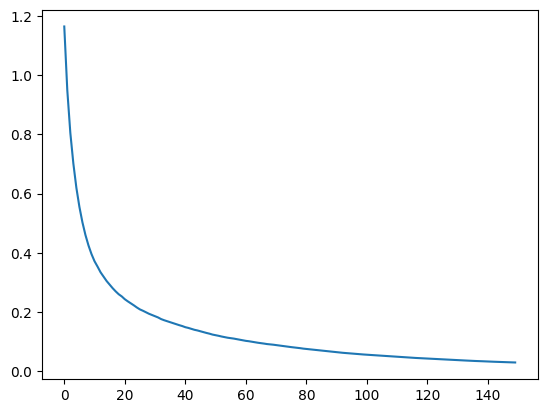

In [ ]:
plt.plot(model3.train_score_)

- Plotting deviance (loss) against the number of iterations helps in analyzing model training.
- Initially, loss is high but decreases with increasing iterations.
- Overfitting is indicated by a decrease in training loss while test loss increases or remains stagnant.
- Early stopping at the point where overfitting begins, typically determined using cross-validation.

#### Disadvantages of Gradient Boosting

1. **Slow Training Process:**

- Traditional Gradient Boosting algorithms suffer from slow training times, especially on large datasets or complex models.
- This slow training process can hinder the scalability of Gradient Boosting for real-world applications, where timely model development is crucial.

2. **Limited Cost Functions:**

- Traditional Gradient Boosting typically relies on a single cost function, such as deviance (logistic loss) for classification problems or squared error for regression.
- The lack of alternative cost functions may limit the model's ability to effectively address specific optimization objectives or handle diverse data characteristics.

3. **Performance Bottlenecks:**

- Gradient Boosting algorithms may encounter performance bottlenecks, particularly in computationally intensive tasks like computing entropy or Gini index.
- These bottlenecks can lead to longer training times and increased resource utilization, making it challenging to deploy models in resource-constrained environments.

4. **Susceptibility to Overfitting:**

- Without adequate regularization techniques, Gradient Boosting models can be prone to overfitting, especially when dealing with noisy or high-dimensional data.
- Overfitting can degrade model generalization performance, resulting in poor performance on unseen data and reduced model reliability.

5. **Complex Parameter Tuning:**

- Gradient Boosting models often involve tuning multiple hyperparameters, such as learning rate, tree depth, and regularization parameters.
- The process of fine-tuning these parameters can be complex and time-consuming, requiring significant expertise and computational resources.

6. **Limited Interpretability:**

- Gradient Boosting models, especially with complex ensembles, may lack interpretability, making it challenging to understand the underlying factors driving model predictions.
- The lack of interpretability can hinder model evaluation, debugging, and stakeholder trust, particularly in domains where explainability is essential.

7. **Dependency on Tree-Based Models:**

- Traditional Gradient Boosting algorithms typically rely on decision tree-based models as base learners.
- While decision trees are powerful, they may not always be the most suitable base model for every problem domain, limiting the algorithm's flexibility and adaptability.

These limitations have been addressed to some extent by advanced techniques like XGBoost, which offer enhanced performance, flexibility, and scalability.

### Xgboost

* XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction.
* XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.
* One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing. Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.
* XGBoost can be used in a variety of applications, including Kaggle competitions, recommendation systems, and click-through rate prediction, among others. It is also highly customizable and allows for fine-tuning of various model parameters to optimize performance.

1. **Advanced Version of Gradient Boosting:**

- XGBoost is presented as an evolution of traditional gradient boosting algorithms.
- It builds upon the principles of gradient boosting but introduces several enhancements to improve performance and address limitations.

2. **Addressing Slow Training Process:**

- One of the key improvements in XGBoost is its ability to overcome the slow training process associated with traditional gradient boosting.
- By implementing optimized algorithms and parallelization techniques, XGBoost significantly reduces training times while maintaining or even improving model accuracy.

3. **Variety of Cost Functions:**

- Unlike traditional gradient boosting methods that often rely solely on deviance as the cost function, XGBoost introduces a range of alternative cost functions.
- These additional cost functions provide flexibility in model optimization, allowing users to choose the most appropriate metric for their specific problem domain.

4. **Parallelization Techniques:**

- XGBoost leverages parallelization techniques to enhance performance, particularly in computationally intensive tasks such as computing entropy or Gini index.
- By distributing computation across multiple processing units or cores, XGBoost can effectively utilize hardware resources and expedite model training.

5. **Sub-sampling and Regularization:**

- To address the issue of overfitting, XGBoost incorporates techniques such as sub-sampling and regularization.
- Sub-sampling involves randomly selecting a subset of data samples for each iteration of the boosting process, thereby reducing the impact of noisy or outlier data points.
- Regularization methods are applied to control the complexity of the learned model and prevent it from fitting the training data too closely, thus improving generalization to unseen data.

XGBoost represents a significant advancement in the field of gradient boosting, offering improved efficiency, flexibility, and robustness in model training and deployment.




#### How does XGBoost work?

Let's understand the working of XGBoost with the help of an example-

Let’s consider an example dataset:

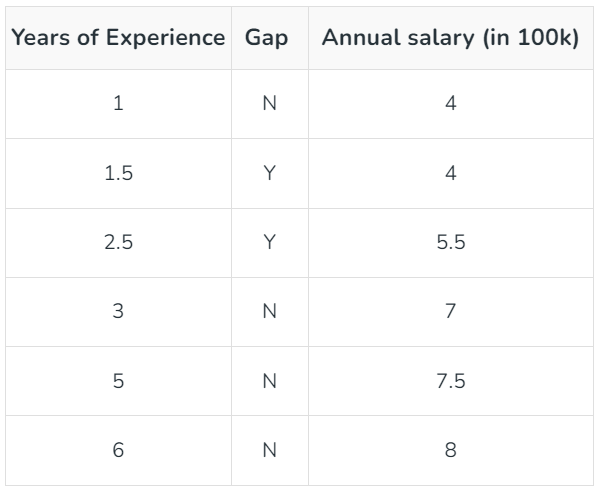

1. First we take the base learner, by default the base model always take the average salary i.e $F_0 =6$              (100k). Now, we calculate the residual values:

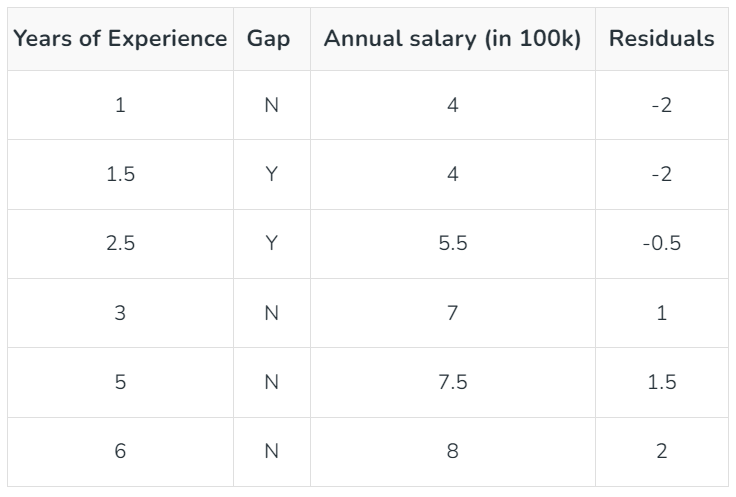

2. Now, let’s consider the decision tree, we will be splitting the data based on experience <=2 or otherwise.

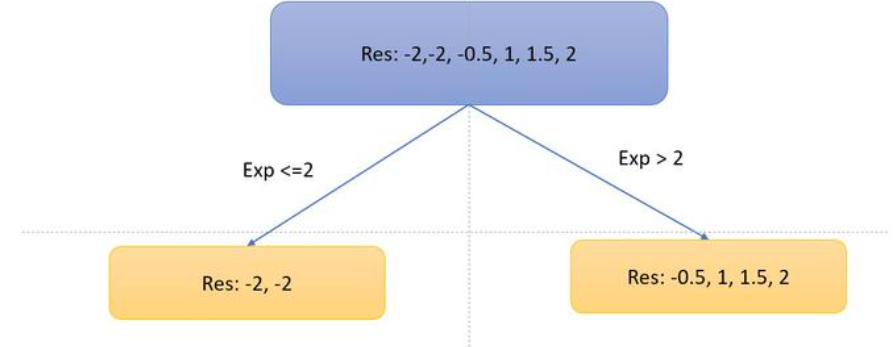

Now, let’s calculate the similarity metrices of left and right side. Since, it is the regression problem the similarity metric will be:

$S_m  = \frac{\sum (res)^{2}}{n_{res} + \lambda}$

where, $\lambda$ = hyperparameter

and for the classification problem:

$S = \frac{\sum (res)^{2}}{P_{r} + (1-P_{r})}$

where, $P_r$ = probability of either left side of right side. Let’s take $\lambda = 1$, the similarity metrics of the left side:

$S_{L} = \frac{(-4)^2}{2+1} = \frac{16}{3} =5.33$ and for the right side.

$S_{R} = \frac{(4)^2}{4+1} = \frac{16}{5} =3.2$ and for the top branch:

$S_{T} = \frac{1}{7} =0.143$.

Now, the information gain from this split is:

$GAIN  = S_{L} + S_{R}- S_{T} = 6.33 +3.2 -0.143 = 9.328$

Similarly, we can try multiple splits and calculate the information gain. We will take the split with the highest information gain. Let’s for now take this information gain. Further, we will split the decision tree if there is a gap or not.

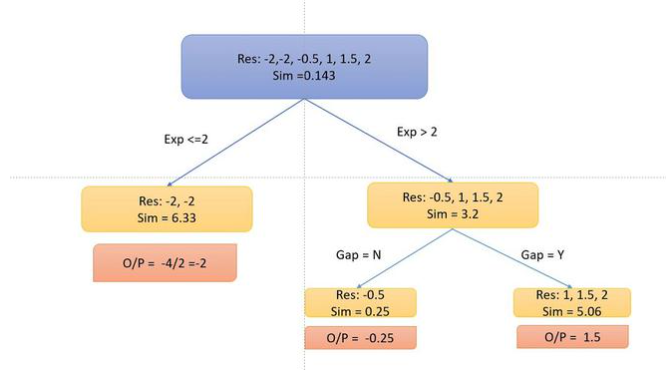

* Now, As you can notice that I didn’t split into the left side because the information Gain becomes negative. So, we only perform split on the right side.
* To calculate the particular output, we follow the decision tree multiplied with a learning rate $\alpha$ (let’s take 0.5) and add with the previous learner (base learner for the first tree) i.e for data point 1: $o/p$  = 6 + 0.5 *-2 = 5.
* Similarly, the algorithm produces more than one decision tree and combine them additively to generate better estimates

#### Implementation of Xgboost

In [ ]:
import xgboost as xgb

params = {'max_depth': 5, 'eta': 1, 'objective':'multi:softmax', 'num_class': 20, 'n_estimators': 150}

model4 = xgb.XGBClassifier(**params)

start = dt.datetime.now()
model4.fit(X_train, Y_train,
           eval_set = [(X_train, Y_train), (X_test, Y_test)],
           eval_metric = ['mlogloss', 'merror'],
           verbose = True
           )

end = dt.datetime.now()

eval_result = model4.evals_result()

[0]	validation_0-mlogloss:0.70774	validation_0-merror:0.19007	validation_1-mlogloss:0.85227	validation_1-merror:0.22648
[1]	validation_0-mlogloss:0.54954	validation_0-merror:0.16502	validation_1-mlogloss:0.74503	validation_1-merror:0.21532
[2]	validation_0-mlogloss:0.50603	validation_0-merror:0.12709	validation_1-mlogloss:0.66744	validation_1-merror:0.18844
[3]	validation_0-mlogloss:0.34380	validation_0-merror:0.10046	validation_1-mlogloss:0.57170	validation_1-merror:0.17474
[4]	validation_0-mlogloss:0.27635	validation_0-merror:0.08701	validation_1-mlogloss:0.51818	validation_1-merror:0.16561
[5]	validation_0-mlogloss:0.23513	validation_0-merror:0.07591	validation_1-mlogloss:0.49327	validation_1-merror:0.16054
[6]	validation_0-mlogloss:0.20051	validation_0-merror:0.06431	validation_1-mlogloss:0.46422	validation_1-merror:0.15115
[7]	validation_0-mlogloss:0.17348	validation_0-merror:0.05498	validation_1-mlogloss:0.44528	validation_1-merror:0.14304
[8]	validation_0-mlogloss:0.15407	valida

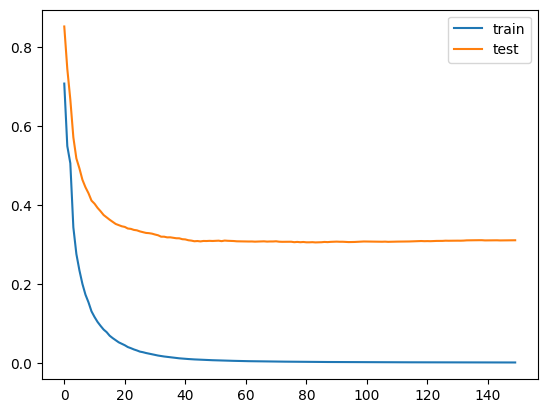

In [ ]:
plt.plot(eval_result['validation_0']['mlogloss'], label="train")
plt.plot(eval_result['validation_1']['mlogloss'], label="test")
plt.legend()
plt.show()

### CatBoost

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today. To top it up, it provides best-in-class accuracy.

It is especially powerful in two ways:

* It yields state-of-the-art results without extensive data training typically required by other machine learning methods, and
* Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.

“CatBoost” name comes from two words “**Cat**egory” and “**Boost**ing”.

As discussed, the library works well with multiple **Cat**egories of data, such as audio, text, image including historical data.

* For high-performance gradient boosting on structured datasets, CatBoost is a potent open-source machine-learning technique. CatBoost is very good at managing categorical features effectively and doesn’t require a lot of preprocessing.
* Through the optimization of categorical value ordering during training, it uses an approach known as ordered boosting to minimize overfitting.
* CatBoost also uses oblivious trees, which improve computational performance. Imputation is not necessary because the method handles missing values automatically. Adding decision trees to an ensemble iteratively during the training process helps CatBoost optimize the model’s performance.
* It has grown in popularity because of its innovative capabilities, easy-to-use interface, and steady handling of a wide range of datasets. As such, it is a useful tool for some machine learning tasks, such as regression analysis, ranking, and classification.

#### How does CatBoost work?

Catboost works on gradient boosting algorithms in which decision trees are constructed iteratively on each iteration and each tree improves the results of the previous trees leading to better results. The difference between catboost and other gradient boosting algorithms is that it handles the categorical features, performs cross-validation, regularization to avoid overfitting, etc, on its own which gives catboost an edge over other algorithms as no preprocessing is required.

**How Catboost handles categorical features?**

There are many traditional encoding methods supported by catboost but the one that is unique to it is Ordered encoding in which target encoding of some type is performed followed by random permutation of the dataset. Generally, this conversion consists of 3 steps –

* Random Permutation
* Quantization, which basically involves changing value to integers depending on the problem i.e. 0 and 1 for binary classification, 0 to n for multi-class classification, etc.
* Then, Encoding the categorical feature values.

**Catboost Features**

* **Categorical Feature Handling**: When handling categorical features, CatBoost performs exceptionally well and doesn’t require a lot of preprocessing. Categorical variables are internally encoded, which lowers the possibility of data leakage and enhances model performance.
* **Handling of Missing Data**: During training, CatBoost handles missing values automatically, removing the need for manual imputation. This streamlines the preprocessing procedures and enhances the model’s resilience.
* **Efficient GPU Training**: With GPU acceleration support, CatBoost enables faster training on suitable systems. Reducing training durations and managing big datasets are two advantages of this feature.
* **User-friendly Interface**: CatBoost provides a user-friendly interface, making it accessible to both beginners and experienced data scientists. It offers easy-to-use parameters and tools for model interpretation.
* **Robustness**: Regularization strategies are among the techniques that CatBoost uses to reduce overfitting and improve the model’s capacity to generalize to new, unobserved data.

**Catboost Parameters**

How much the model learns from the data depends on the parameters. These parameters can be adjusted accordingly by the programmer and each models has a unique set of parameters for a better performance. Catboost parameters are –

* **iterations**: Indicates how many trees or boosting rounds need to be constructed. The model performs better overall when there are more trees, but this can cause overfitting.
* **learning_rate**: It controls the optimization process’s step size. Requiring fewer rounds, lower values strengthen the optimization process.
* **depth**: sets the trees’ depth. Although they can cause overfitting, deeper trees can catch more intricate patterns. In order to balance for model complexity, this parameter is essential.
* **l2_leaf_reg**: It prevents the model from overfitting by penalizing large parameter values.
* **random_strength**: Regulates how randomly splits are chosen during training. Increasing the value can potentially prevent overfitting by adding additional unpredictability.
* **cat_features**: Indicates the categorical feature indices. Although CatBoost manages these aspects effectively on its own, performance can be enhanced by giving explicit indices.
* **loss_function**: It determines the loss function that will be used for calculating the loss. It depends on whether the problems is a regression or classification problem.
* **early_stopping_rounds**: If set, training ends after a predetermined number of rounds if the validation set’s evaluation metric doesn’t get better.
* **num_folds**: Defines how many folds will be used for cross-validation in training. aids in evaluating generalization and model performance.

#### Implementation of Catboost

Now, we’ll apply the catboost algorithm on a dataset to see how it’s better than other gradient boosting algorithms. For this, we’ll be using the iris dataset.

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
df['Species'] = iris.target

# Display the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
df.shape

(150, 5)

As shown in the output, the dataset has 5 columns and 150 rows. So basically, this dataset contains the sepal length, sepal width, petal length, petal width of three species of flower. We can see the uniques species using the below code.

In [ ]:

# Split the data into features (X) and target variable (Y)
X = df.drop("Species", axis='columns')
Y = df['Species']

In [ ]:
# Splitting the dataset into training and test

X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size=0.2, random_state=5)

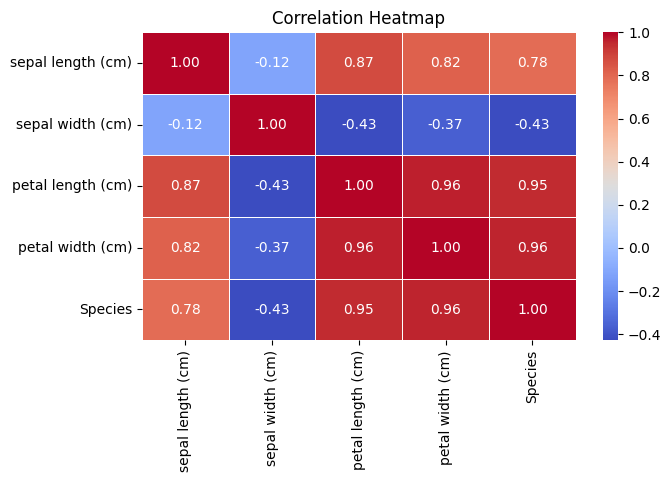

In [ ]:
# perform EDA

# EDA: Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True,
			cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The pairwise correlation between the numerical features in the dataset is visualized using a correlation heatmap that is created by this code. The heatmap is produced using Seaborn’s heatmap function, and the correlation matrix is computed using the corr method. For improved viewing, the color map “coolwarm” is utilized in conjunction with the annot=True parameter to show the correlation coefficients on the heatmap.

In [ ]:
# Create a CatBoostClassifier
model = CatBoostClassifier(iterations=500, # Number of boosting iterations
                           depth=6, # Depth of the tree
                           learning_rate=0.1,
                           loss_function='MultiClass', # For multiclass classification
                           verbose=200) # Print progress every 200 iterations

A CatBoostClassifier is initialized with particular hyperparameters by this code. A tree depth of 6 (depth), a learning rate of 0.1 (learning_rate), 500 boosting iterations (iterations), and the ‘MultiClass’ loss function appropriate for multiclass classification are all specified. Throughout the training procedure, the verbose=200 parameter publishes progress statistics every 200 iterations.

**Grid Search for hyperparameter tuning**

Let’s look into GridSeachCV now. We’ll start by importing the GridSearchCV method from sklearn.

In [ ]:
# Grid Search for hyperparameter tuning
param_grid = {
	'iterations': [500, 1000],
	'depth': [4, 6, 8],
	'learning_rate': [0.01, 0.1, 0.2],
	'l2_leaf_reg': [1, 3, 5],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

0:	learn: 1.0834641	total: 46.6ms	remaining: 23.2s
200:	learn: 0.1881361	total: 97.6ms	remaining: 145ms
400:	learn: 0.0773013	total: 139ms	remaining: 34.3ms
499:	learn: 0.0576647	total: 159ms	remaining: 0us
Best Parameters: {'depth': 4, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.01}


This code uses the GridSearchCV function from scikit-learn to conduct a grid search for hyperparameter tuning. It investigates several hyperparameter combinations, including learning rate, L2 regularization strength, tree depth, and iteration count. The grid search is carried out using 5-fold cross-validation (cv=5), and accuracy (scoring=’accuracy’) is used to assess the model’s performance.

In [ ]:
# Create a new model with the best parameters
model_2 = CatBoostClassifier(
	**best_params, loss_function='MultiClass', verbose=200)
model_2.fit(X_train, Y_train)

0:	learn: 1.0834641	total: 506us	remaining: 253ms
200:	learn: 0.1881361	total: 301ms	remaining: 447ms
400:	learn: 0.0773013	total: 644ms	remaining: 159ms
499:	learn: 0.0576647	total: 785ms	remaining: 0us


This code uses the best hyperparameters found in the grid search (best_params) to build a new CatBoostClassifier (model_2). The training set of X_train and Y_train is used to train the model, with the loss_function explicitly specified to ‘MultiClass’. During training, progress updates will be reported every 200 iterations according to the verbose=200 parameter.

In [ ]:
# Evaluate the model
score = model_2.score(X_test, Y_test)
print("Model Accuracy:", score)

Model Accuracy: 0.9


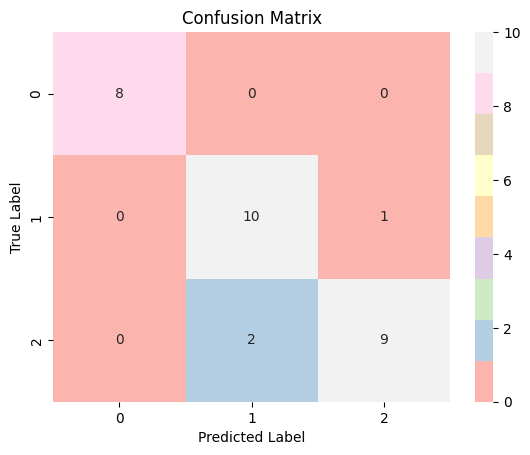

In [ ]:
# Predictions and evaluation
y_pred = model_2.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1',
			xticklabels=model_2.classes_, yticklabels=model_2.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



#### Advantages and Disadvantages of catboost


**Advantages**:

* It can efficiently handle all the categorical variables without much preprocessing by using a bunch of encoding techniques.
* Implements certain techniques to avoid overfitting and making the model more robust.
* It comes with good default parameters which work quite well without much fine tuning.

**Disadvantages:**

* The model sizes are quite big which makes it difficult while deploying in a production environment.
* It is a memory intensive algorithm.

## Bagging v/s Boosting

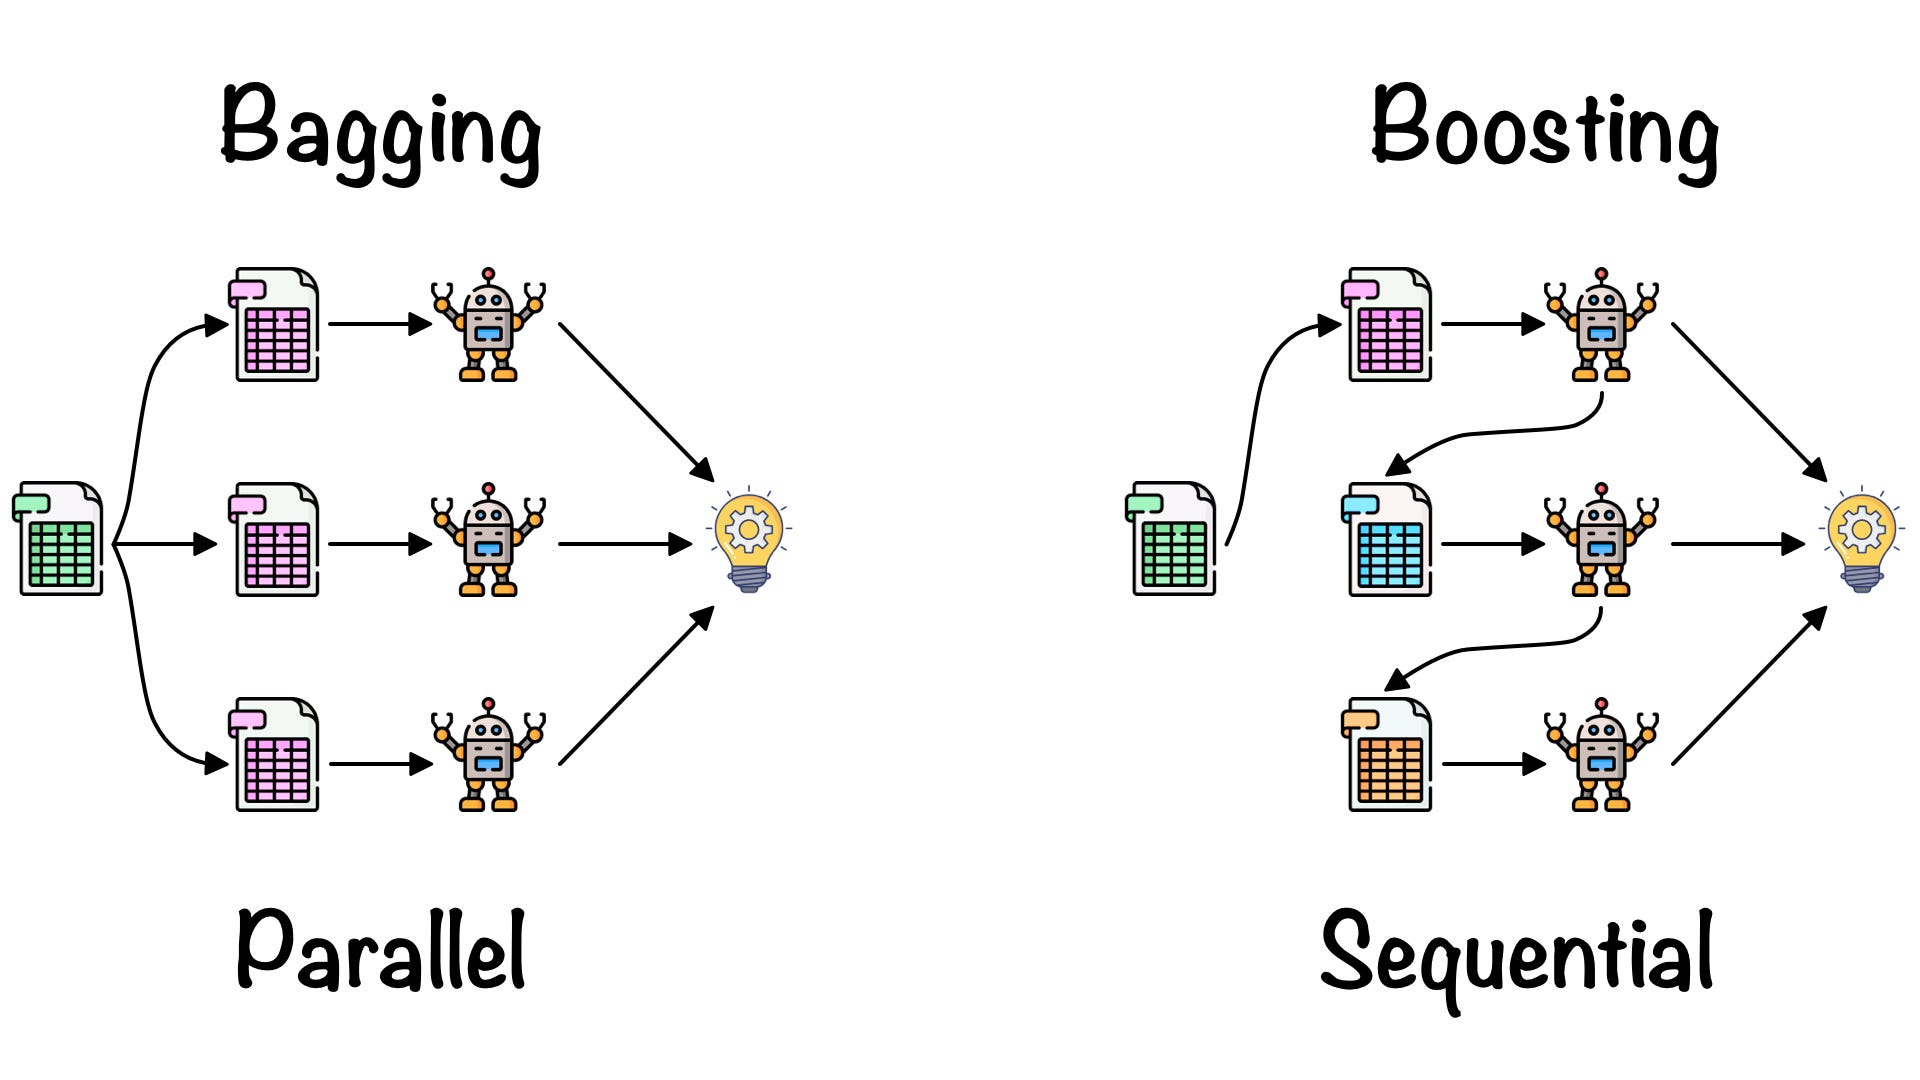

1. **Parallel vs. Sequential Process:**
  - Bagging: Bagging is characterized as a parallel process. In bagging, multiple base models (often decision trees) are trained independently on different subsets of the training data, typically sampled with replacement. Each base model is trained on a random subset of the data, and their predictions are aggregated through techniques like averaging or voting to produce the final ensemble prediction.
  - Boosting: In contrast, boosting is a sequential process. Boosting involves training a series of base models sequentially, where each subsequent model learns from the mistakes of its predecessors. Unlike bagging, where models are trained independently, boosting leverages the feedback mechanism of sequentially refining the model's predictions by focusing on instances where previous models performed poorly.

2. **Training Approach:**
  - Bagging: Each base model in bagging is trained independently, and there is no interdependence between the models. The individual models contribute equally to the final ensemble prediction.
  - Boosting: Boosting employs a sequential approach, where each model in the sequence is trained to correct the errors made by the preceding models. The training process focuses on difficult-to-predict instances, assigning higher weights to misclassified examples in subsequent iterations.

3. **Computational Complexity:**
  - Bagging: Due to its parallel nature, bagging can be computationally efficient, especially when leveraging parallel processing capabilities. Each base model can be trained independently, allowing for potential speed-ups when processing large datasets.
  - Boosting: Boosting tends to be more computationally intensive compared to bagging. The sequential nature of boosting necessitates training models sequentially, with each iteration building upon the previous ones. As a result, boosting may require more computational resources and time, particularly as the number of iterations increases.

 While both bagging and boosting aim to improve model performance through ensemble learning, they differ in their approach to model training and aggregation of predictions. Bagging operates in parallel, with independent base models, while boosting is a sequential process that iteratively refines model predictions. The choice between bagging and boosting often depends on the specific characteristics of the dataset and the trade-offs between computational complexity and predictive performance.